# Contexte et objectif

Dans le cadre de l’objectif de neutralité carbone à l’horizon 2050, la ville de Seattle s’intéresse à la consommation énergétique et aux émissions de CO₂ des bâtiments non destinés à l’habitation.

Des relevés détaillés ont été réalisés par les services municipaux en 2016. À partir de ces données, l’objectif de ce projet est de développer des modèles capables de prédire la consommation totale d’énergie et les émissions de CO₂ de bâtiments non résidentiels pour lesquels ces informations ne sont pas encore disponibles.

# I. Analyse Exploratoire

### I. 1. Import des modules et du dataset

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
building_consumption = pd.read_csv('2016_Building_Energy_Benchmarking.csv')

### I. 2. Premiers aperçus
#### I. 2. a) Information du dataset

In [4]:
# On regarde comment un batiment est défini dans ce jeu de données 
pd.set_option('display.max_columns', None)
building_consumption.head()

OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
0              1      2016  NonResidential               Hotel   
1              2      2016  NonResidential               Hotel   
2              3      2016  NonResidential               Hotel   
3              5      2016  NonResidential               Hotel   
4              8      2016  NonResidential               Hotel   

                  PropertyName          Address     City State  ZipCode  \
0         Mayflower park hotel    405 Olive way  Seattle    WA  98101.0   
1              Paramount Hotel  724 Pine street  Seattle    WA  98101.0   
2      5673-The Westin Seattle  1900 5th Avenue  Seattle    WA  98101.0   
3                    HOTEL MAX   620 STEWART ST  Seattle    WA  98101.0   
4  WARWICK SEATTLE HOTEL (ID8)    401 LENORA ST  Seattle    WA  98121.0   

  TaxParcelIdentificationNumber  CouncilDistrictCode Neighborhood  Latitude  \
0                    0659000030                    7     DOWNTOWN  47.61220   
1                    0659000220                    7     DOWNTOWN  47.61317   
2                    0659000475                    7     DOWNTOWN  47.61393   
3                    0659000640                    7     DOWNTOWN  47.61412   
4                    0659000970                    7     DOWNTOWN  47.61375   

   Longitude  YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0 -122.33799       1927                1.0              12             88434   
1 -122.33393       1996                1.0              11            103566   
2 -122.33810       1969                1.0              41            956110   
3 -122.33664       1926                1.0              10             61320   
4 -122.34047       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)      ListOfAllPropertyUseTypes  \
0                   0                   88434                          Hotel   
1               15064                   88502     Hotel, Parking, Restaurant   
2              196718                  759392                          Hotel   
3                   0                   61320                          Hotel   
4               62000                  113580  Hotel, Parking, Swimming Pool   

  LargestPropertyUseType  LargestPropertyUseTypeGFA  \
0                  Hotel                    88434.0   
1                  Hotel                    83880.0   
2                  Hotel                   756493.0   
3                  Hotel                    61320.0   
4                  Hotel                   123445.0   

  SecondLargestPropertyUseType  SecondLargestPropertyUseTypeGFA  \
0                          NaN                              NaN   
1                      Parking                          15064.0   
2                          NaN                              NaN   
3                          NaN                              NaN   
4                      Parking                          68009.0   

  ThirdLargestPropertyUseType  ThirdLargestPropertyUseTypeGFA  \
0                         NaN                             NaN   
1                  Restaurant                          4622.0   
2                         NaN                             NaN   
3                         NaN                             NaN   
4               Swimming Pool                             0.0   

  YearsENERGYSTARCertified  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                      NaN             60.0         81.699997   
1                      NaN             61.0         94.800003   
2                      NaN             43.0         96.000000   
3                      NaN             56.0        110.800003   
4                      NaN             75.0        114.800003   

   SiteEUIWN(kBtu/sf)  SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  \
0           84.300003          182.500000            189.000000   
1           97.900002          176.100006            179.399994   
2

In [5]:
building_consumption.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    3376.000000    3376.0   3360.000000          3376.000000   
mean    21208.991114    2016.0  98116.949107             4.439277   
std     12223.757015       0.0     18.615205             2.120625   
min         1.000000    2016.0  98006.000000             1.000000   
25%     19990.750000    2016.0  98105.000000             3.000000   
50%     23112.000000    2016.0  98115.000000             4.000000   
75%     25994.250000    2016.0  98122.000000             7.000000   
max     50226.000000    2016.0  98272.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  3376.000000  3376.000000  3376.000000        3368.000000   
mean     47.624033  -122.334795  1968.573164           1.106888   
std       0.047758     0.027203    33.088156           2.108402   
min      47.499170  -122.414250  1900.000000           0.000000   
25%      47.599860  -122.350662  1948.000000           1.000000   
50%      47.618675  -122.332495  1975.000000           1.000000   
75%      47.657115  -122.319407  1997.000000           1.000000   
max      47.733870  -122.220966  2015.000000         111.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     3376.000000      3.376000e+03         3376.000000   
mean         4.709123      9.483354e+04         8001.526066   
std          5.494465      2.188376e+05        32326.723928   
min          0.000000      1.128500e+04            0.000000   
25%          2.000000      2.848700e+04            0.000000   
50%          4.000000      4.417500e+04            0.000000   
75%          5.000000      9.099200e+04            0.000000   
max         99.000000      9.320156e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            3.376000e+03               3.356000e+03   
mean             8.683201e+04               7.917764e+04   
std              2.079398e+05               2.017034e+05   
min              3.636000e+03               5.656000e+03   
25%              2.775600e+04               2.509475e+04   
50%              4.321600e+04               3.989400e+04   
75%              8.427625e+04               7.620025e+04   
max              9.320156e+06               9.320156e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                      1679.000000                      596.000000   
mean                      28444.075817                    11738.675166   
std                       54392.917928                    29331.199286   
min                           0.000000                        0.000000   
25%                        5000.000000                     2239.000000   
50%                       10664.000000                     5043.000000   
75%                       26640.000000                    10138.750000   
max                      686750.000000                   459748.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count      2533.000000       3369.000000         3370.000000   
mean         67.918674         54.732116           57.033798   
std          26.873271         56.273124           57.163330   
min           1.000000          0.000000            0.000000   
25%          53.000000         27.900000           29.400000   
50%          75.000000         38.599998           40.900002   
75%          90.000000         60.400002           64.275002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         3367.000000           3367.000000         3.371000e+03   
mean           134.232848            137.783932         5.403667e+06   
std            139.287554            139.109807         2.161063e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             74.699997             78.400002         9.251286e+05

In [6]:
building_consumption.sample(10)

OSEBuildingID  DataYear          BuildingType  \
2166          24646      2016    Nonresidential COS   
570             764      2016        NonResidential   
1441          21813      2016  Multifamily LR (1-4)   
365             517      2016        NonResidential   
276             405      2016        NonResidential   
2513          25910      2016  Multifamily MR (5-9)   
2412          25563      2016        NonResidential   
1416          21736      2016  Multifamily MR (5-9)   
1794          23439      2016  Multifamily LR (1-4)   
1116          20917      2016        NonResidential   

              PrimaryPropertyType                         PropertyName  \
2166                        Other  Southwest Teen Life Center and Pool   
570                  Large Office    Financial Center - COS Compliance   
1441         Low-Rise Multifamily                      8501 Crown Hill   
365   Supermarket / Grocery Store                  Sam's Club #18-6687   
276                  Large Office                          The Decatur   
2513         Mid-Rise Multifamily                Martinique Apartments   
2412                    Warehouse                     Nautical Landing   
1416         Mid-Rise Multifamily            Cascade Senior Apartments   
1794         Low-Rise Multifamily            Kinnear Plaza Condominium   
1116                  K-12 School                      St. John School   

                   Address     City State  ZipCode  \
2166       2801 Thistle St  Seattle    WA  98106.0   
570        1215 4th Avenue  Seattle    WA  98101.0   
1441      8501 12th Avenue  Seattle    WA  98103.0   
365   13550 Aurora Ave. N.  Seattle    WA  98133.0   
276        1511 6th Avenue  Seattle    WA  98101.0   
2513      2122 8th Ave. N.  Seattle    WA  98109.0   
2412   2500 Westlake Ave N  Seattle    WA  98109.0   
1416       430 minor Ave N  Seattle    WA  98109.0   
1794   505 West Roy Street  Seattle    WA  98119.0   
1116       120 N. 79th St.  Seattle    WA  98103.0   

     TaxParcelIdentificationNumber  CouncilDistrictCode  \
2166                    3624039172                    1   
570                     0002400002                    7   
1441                    2285450000                    6   
365                     1926049230                    5   
276                     1975700125                    7   
2513                    9301300560                    7   
2412                    4088804350                    7   
1416                    2467400267                    7   
1794                    3877700000                    7   
1116                    1646501150                    6   

               Neighborhood  Latitude  Longitude  YearBuilt  \
2166               DELRIDGE  47.52801 -122.36918       1975   
570                DOWNTOWN  47.60765 -122.33480       1970   
1441                BALLARD  47.69090 -122.37175       1980   
365               NORTHWEST  47.72803 -122.34214       1984   
276                DOWNTOWN  47.61166 -122.33528       1921   
2513  MAGNOLIA / QUEEN ANNE  47.63908 -122.34228       1966   
2412  MAGNOLIA / QUEEN ANNE  47.64306 -122.34219       1968   
1416             LAKE UNION  47.62293 -122.33263       2009   
1794  MAGNOLIA / QUEEN ANNE  47.62563 -122.36358       1982   
1116              NORTHWEST  47.68642 -122.35707       1922   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
2166                0.0               2             27227                   0   
570                 1.0              29            489182                   0   
1441                1.0               4             45421                   0   
365                 0.0               1            144776                   0   
276                 1.0               4            127268                   0   
2513                1.0               5             61107                   0   
2412                1.0               2             29498                   0  

In [7]:
# On regarde le nombre de valeurs manquantes par colonne ainsi que leur type 
building_consumption.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

#### I. 2. b) Première identification des valeurs manquantes

In [8]:
building_consumption.isnull().sum()

OSEBuildingID                         0
DataYear                              0
BuildingType                          0
PrimaryPropertyType                   0
PropertyName                          0
Address                               0
City                                  0
State                                 0
ZipCode                              16
TaxParcelIdentificationNumber         0
CouncilDistrictCode                   0
Neighborhood                          0
Latitude                              0
Longitude                             0
YearBuilt                             0
NumberofBuildings                     8
NumberofFloors                        0
PropertyGFATotal                      0
PropertyGFAParking                    0
PropertyGFABuilding(s)                0
ListOfAllPropertyUseTypes             9
LargestPropertyUseType               20
LargestPropertyUseTypeGFA            20
SecondLargestPropertyUseType       1697
SecondLargestPropertyUseTypeGFA    1697


In [9]:
pd.DataFrame(building_consumption.isna().mean()).reset_index().sort_values(by=0, ascending = False)

index         0
41                         Comments  1.000000
43                          Outlier  0.990521
27         YearsENERGYSTARCertified  0.964751
25      ThirdLargestPropertyUseType  0.823460
26   ThirdLargestPropertyUseTypeGFA  0.823460
23     SecondLargestPropertyUseType  0.502666
24  SecondLargestPropertyUseTypeGFA  0.502666
28                  ENERGYSTARScore  0.249704
22        LargestPropertyUseTypeGFA  0.005924
21           LargestPropertyUseType  0.005924
8                           ZipCode  0.004739
20        ListOfAllPropertyUseTypes  0.002666
32             SourceEUIWN(kBtu/sf)  0.002666
31               SourceEUI(kBtu/sf)  0.002666
36                 Electricity(kWh)  0.002666
37                Electricity(kBtu)  0.002666
38               NaturalGas(therms)  0.002666
39                 NaturalGas(kBtu)  0.002666
44                TotalGHGEmissions  0.002666
35                   SteamUse(kBtu)  0.002666
45            GHGEmissionsIntensity  0.002666
15                NumberofBuildings  0.002370
29                 SiteEUI(kBtu/sf)  0.002073
30               SiteEUIWN(kBtu/sf)  0.001777
34            SiteEnergyUseWN(kBtu)  0.001777
33              SiteEnergyUse(kBtu)  0.001481
9     TaxParcelIdentificationNumber  0.000000
2                      BuildingType  0.000000
3               PrimaryPropertyType  0.000000
42                 ComplianceStatus  0.000000
4                      PropertyName  0.000000
40                      DefaultData  0.000000
5                           Address  0.000000
6                              City  0.000000
7                             State  0.000000
19           PropertyGFABuilding(s)  0.000000
10              CouncilDistrictCode  0.000000
18               PropertyGFAParking  0.000000
11                     Neighborhood  0.000000
12                         Latitude  0.000000
13                        Longitude  0.000000
14                        YearBuilt  0.000000
16                   NumberofFloors  0.000000
17                 PropertyGFATotal  0.000000
1                          DataYear  0.000000
0                     OSEBuildingID  0.000000

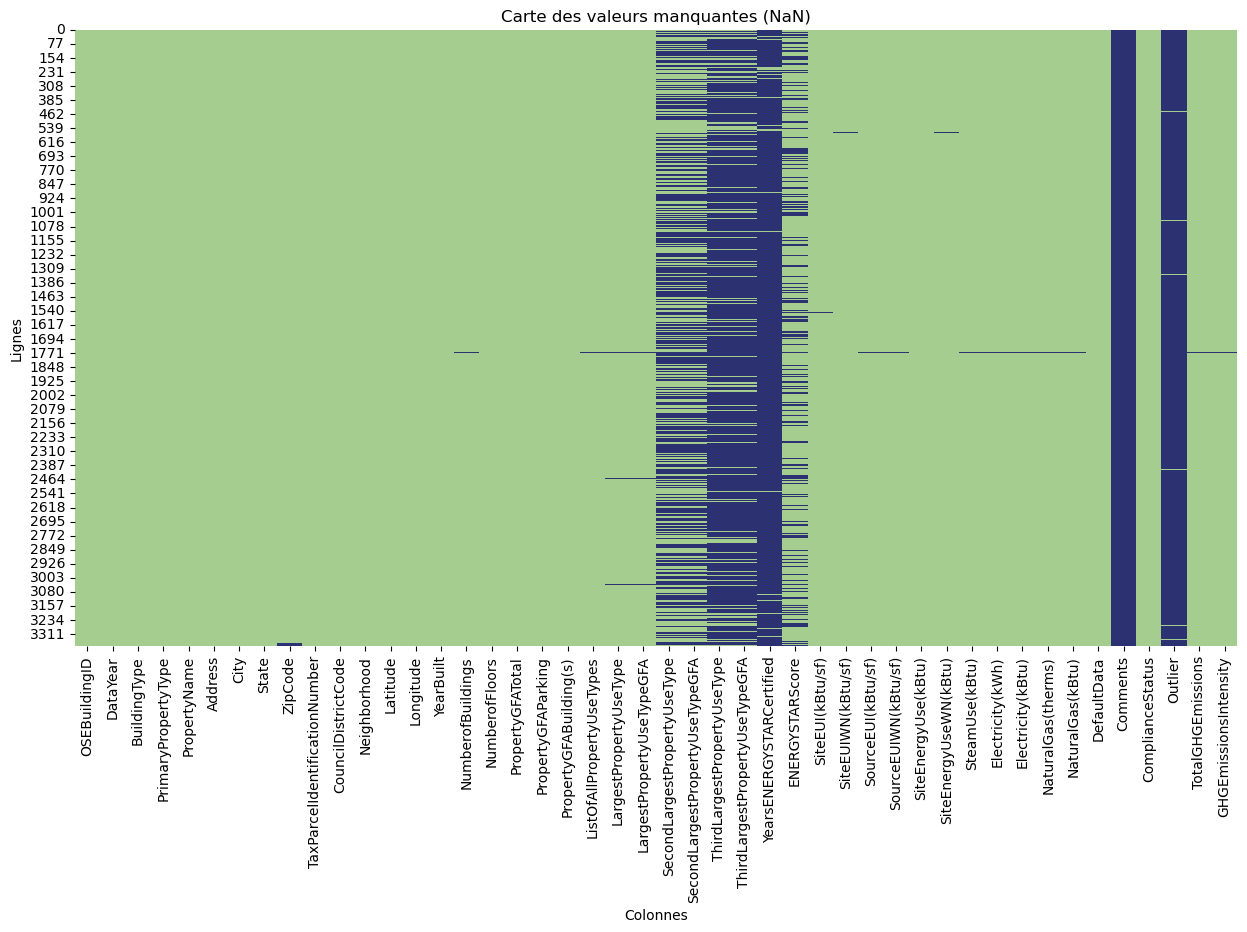

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.heatmap(building_consumption.isna() # booléens True/False indiquant si les valeurs sont manquantes (True le cas échéant)
            , cbar=False # pas besoin de spectre de couleur
            , cmap="crest") 

plt.title("Carte des valeurs manquantes (NaN)")
plt.xlabel("Colonnes")
plt.ylabel("Lignes")
plt.show()

#### I. 2. c) Filtrage du dataset : Réduction du périmètre d'analyse

##### - Filtrage des lignes : focus sur les bâtiments non-résidentiels

In [11]:
building_consumption['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [12]:
# Filtrage des bâtiments non résidentiels

print("Dimensions avant filtrage:", building_consumption.shape)

df = building_consumption[
    building_consumption['BuildingType'].str.contains('NonResidential', na=False)
].copy()

Dimensions avant filtrage: (3376, 46)


In [13]:
print("Dimensions après filtrage:", df.shape)

Dimensions après filtrage: (1460, 46)


In [14]:
df

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

         City State  ZipCode TaxParcelIdentificationNumber  \
0     Seattle    WA  98101.0                    0659000030   
1     Seattle    WA  98101.0                    0659000220   
2     Seattle    WA  98101.0                    0659000475   
3     Seattle    WA  98101.0                    0659000640   
4     Seattle    WA  98121.0                    0659000970   
...       ...   ...      ...                           ...   
3338  Seattle    WA  98108.0                    2824049007   
3339  Seattle    WA  98108.0                    2824049007   
3340  Seattle    WA  98155.0                    0225049062   
3347  Seattle    WA  98144.0                    7548300840   
3356  Seattle    WA  98109.0                    4088803385   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
0                       7          DOWNTOWN  47.61220 -122.33799       1927   
1                       7          DOWNTOWN  47.61317 -122.33393       1996   
2                       7          DOWNTOWN  47.61393 -122.33810       1969   
3                       7          DOWNTOWN  47.61412 -122.33664       1926   
4                       7          DOWNTOWN  47.61375 -122.34047       1980   
...                   ...               ...       ...        ...        ...   
3338                    2  GREATER DUWAMISH  47.54425 -122.31776       1955   
3339                    2  GREATER DUWAMISH  47.53161 -122.29944       1929   
3340                    4         NORTHEAST  47.68109 -122.26180       2013   
3347                    3  GREATER DUWAMISH  47.58831 -122.30650       2015   
3356                    7        LAKE UNION  47.62497 -122.33883       2015   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580            

In [15]:
df.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    1460.000000    1460.0   1460.000000          1460.000000   
mean    16105.348630    2016.0  98116.597260             4.423288   
std     13335.196101       0.0     18.672664             2.190766   
min         1.000000    2016.0  98006.000000             1.000000   
25%       609.750000    2016.0  98104.000000             2.000000   
50%     21140.500000    2016.0  98109.000000             4.000000   
75%     24567.000000    2016.0  98125.000000             7.000000   
max     50094.000000    2016.0  98199.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  1460.000000  1460.000000  1460.000000        1458.000000   
mean     47.616115  -122.333457  1960.843836           1.034294   
std       0.046616     0.023011    32.966330           0.540904   
min      47.509590  -122.411820  1900.000000           0.000000   
25%      47.587855  -122.342335  1929.000000           1.000000   
50%      47.612420  -122.333195  1965.000000           1.000000   
75%      47.648868  -122.322845  1988.000000           1.000000   
max      47.733870  -122.261800  2015.000000           9.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1460.000000      1.460000e+03         1460.000000   
mean         4.370548      1.130373e+05        14255.386986   
std          6.763737      1.923444e+05        44390.587398   
min          0.000000      1.630000e+04            0.000000   
25%          1.000000      2.916050e+04            0.000000   
50%          3.000000      4.800350e+04            0.000000   
75%          5.000000      1.041622e+05            0.000000   
max         99.000000      1.952220e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.460000e+03               1.454000e+03   
mean             9.878188e+04               9.124103e+04   
std              1.688767e+05               1.562497e+05   
min              3.636000e+03               5.656000e+03   
25%              2.814350e+04               2.521550e+04   
50%              4.591200e+04               4.166800e+04   
75%              9.383225e+04               8.978975e+04   
max              1.765970e+06               1.680937e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       796.000000                      315.000000   
mean                      36543.462685                    14124.479995   
std                       67534.992572                    29053.931157   
min                           0.000000                        0.000000   
25%                        5276.000000                     3000.000000   
50%                       12280.500000                     6000.000000   
75%                       31935.750000                    13173.500000   
max                      686750.000000                   303910.000000   

       ENERGYSTARScore  SiteEUI(kBtu/sf)  SiteEUIWN(kBtu/sf)  \
count       995.000000       1457.000000         1457.000000   
mean         63.862312         73.082704           75.269732   
std          28.917564         75.451798           76.206288   
min           1.000000          0.000000            0.000000   
25%          44.000000         33.700001           35.400002   
50%          71.000000         52.500000           54.599998   
75%          89.000000         82.099998           85.900002   
max         100.000000        834.400024          834.400024   

       SourceEUI(kBtu/sf)  SourceEUIWN(kBtu/sf)  SiteEnergyUse(kBtu)  \
count         1458.000000           1458.000000         1.458000e+03   
mean           180.283059            182.235254         7.743262e+06   
std            192.748456            192.591591         1.909175e+07   
min              0.000000             -2.100000         0.000000e+00   
25%             76.674999             79.400002         1.201677e+06

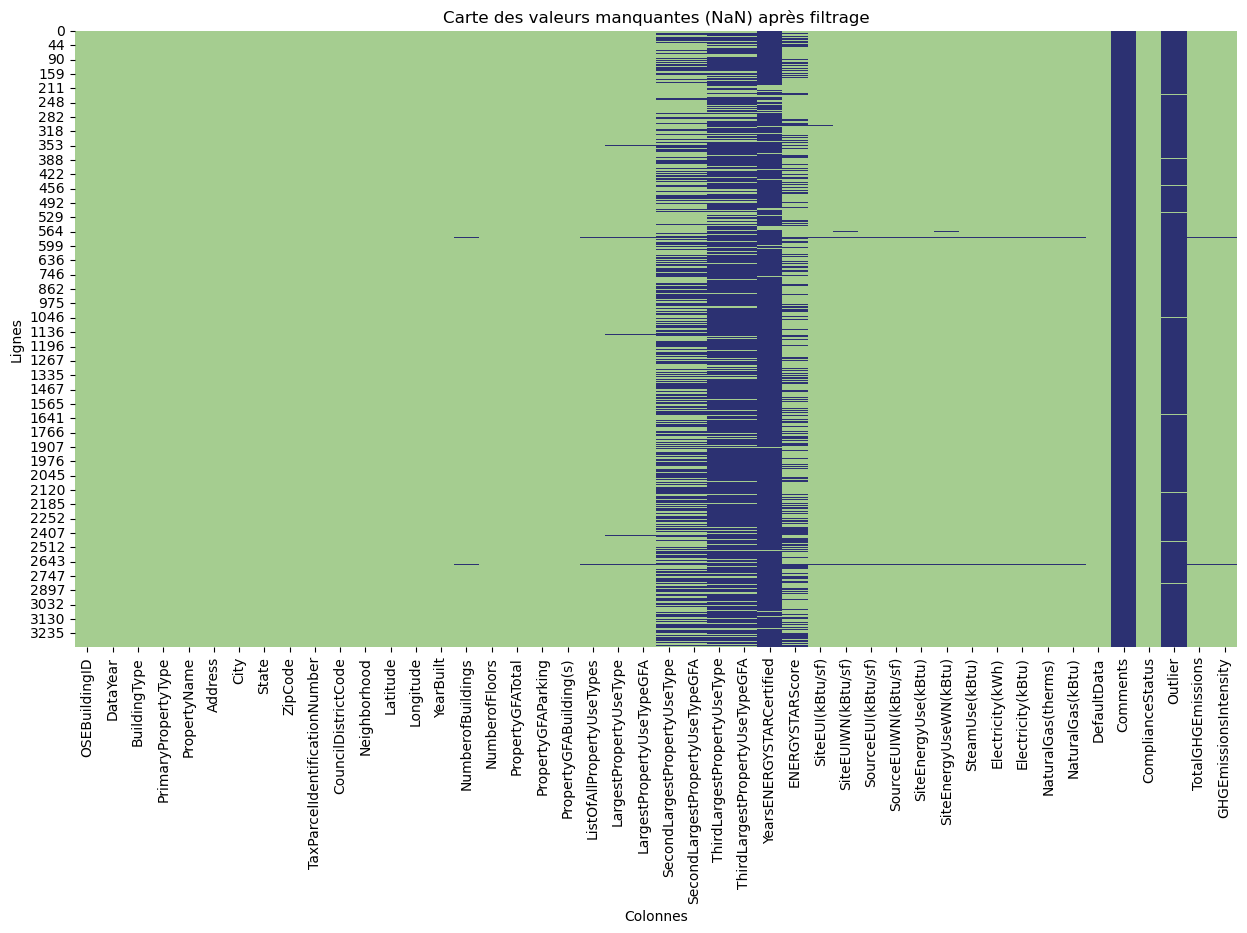

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.heatmap(df.isna() # booléens True/False indiquant si les valeurs sont manquantes (True le cas échéant)
            , cbar=False # pas besoin de spectre de couleur
            , cmap="crest") 

plt.title("Carte des valeurs manquantes (NaN) après filtrage")
plt.xlabel("Colonnes")
plt.ylabel("Lignes")
plt.show()

In [17]:
print(df['Outlier'].unique())
print(df['Comments'].unique())
print(df['BuildingType'].unique())
print(df['City'].unique())
print(df['State'].unique())

[nan 'High outlier' 'Low outlier']
[nan]
['NonResidential']
['Seattle']
['WA']


##### - Suppression des données non pertinentes

<Axes: xlabel='BuildingType'>

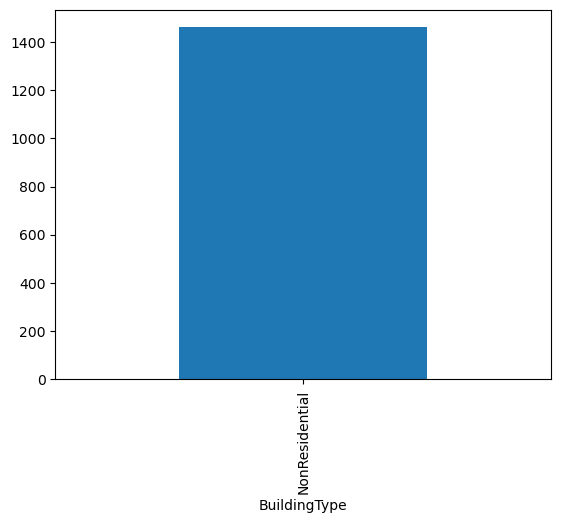

In [18]:
df['BuildingType'].value_counts()
df['BuildingType'].value_counts().plot(kind='bar')

<Axes: xlabel='ComplianceStatus'>

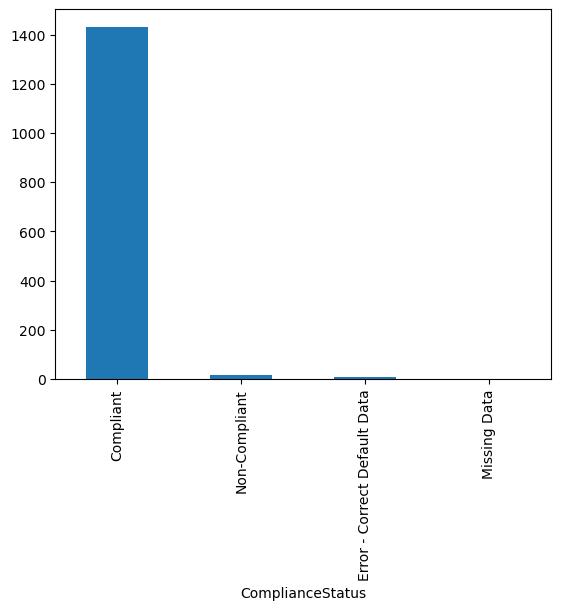

In [19]:
df['ComplianceStatus'].value_counts().plot(kind='bar')

<Axes: xlabel='DefaultData'>

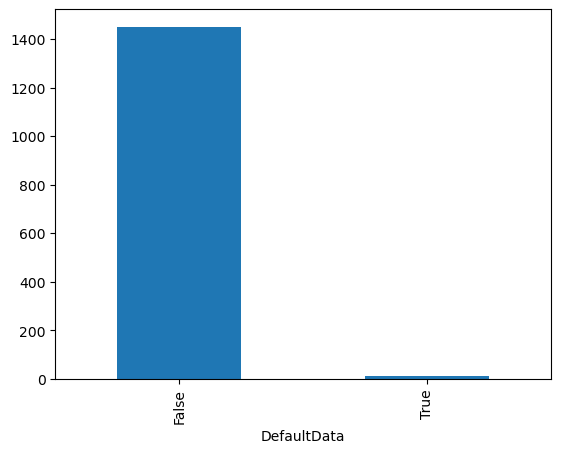

In [20]:
df['DefaultData'].value_counts().plot(kind='bar')

In [21]:
df['DefaultData'].value_counts()

DefaultData
False    1450
True       10
Name: count, dtype: int64

In [22]:
df[df['DefaultData']==True]

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
276             405      2016  NonResidential                 Large Office   
457             618      2016  NonResidential  Small- and Mid-Sized Office   
1045          20617      2016  NonResidential                 Retail Store   
1466          21898      2016  NonResidential                    Warehouse   
1467          21902      2016  NonResidential                    Warehouse   
1641          22953      2016  NonResidential                 Retail Store   
1656          23011      2016  NonResidential                 Retail Store   
1977          24030      2016  NonResidential                 Retail Store   
2076          24374      2016  NonResidential                 Retail Store   
2682          26593      2016  NonResidential  Small- and Mid-Sized Office   

                  PropertyName                           Address     City  \
276                The Decatur                   1511 6th Avenue  Seattle   
457                Prefontaine              110 Prefontaine Pl S  Seattle   
1045     Seattle Habitat Store                    21 S Nevada St  Seattle   
1466      Halfon Candy Company            9229 10th Avenue South  Seattle   
1467                    Samson               9928 10th Ave South  Seattle   
1641                  Tux Shop                  10716 5th Ave NE  Seattle   
1656                     Bevmo                  10700 5th Ave NE  Seattle   
1977           King Plaza 6951  6951 Martin Luther King Jr Way S  Seattle   
2076  Jumbo chinese restaurant              4208 rainier ave so.  Seattle   
2682           Delmar Building           108 South Washington St  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
276     WA  98101.0                    1975700125                    7   
457     WA  98104.0                    5247801045                    7   
1045    WA  98134.0                    1824049074                    2   
1466    WA  98108.0                    2433700076                    1   
1467    WA  98108.0                    2433700165                    1   
1641    WA  98125.0                    2926049039                    5   
1656    WA  98125.0                    2926049223                    5   
1977    WA  98118.0                    3333002890                    2   
2076    WA  98118.0                    7950301480                    2   
2682    WA  98104.0                    5247800481                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
276           DOWNTOWN  47.61166 -122.33528       1921                1.0   
457           DOWNTOWN  47.60159 -122.32915       1909                1.0   
1045  GREATER DUWAMISH  47.56535 -122.34054       1953                1.0   
1466  GREATER DUWAMISH  47.51968 -122.32120       1978                1.0   
1467  GREATER DUWAMISH  47.51918 -122.31957       1979                1.0   
1641             NORTH  47.70747 -122.32249       1965                1.0   
1656             NORTH  47.70708 -122.32251       1966                1.0   
1977  GREATER DUWAMISH  47.53922 -122.28295       2002                1.0   
2076         SOUTHEAST  47.56514 -122.28781       1968                1.0   
2682          DOWNTOWN  47.60102 -122.33378       1900                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
276                4            127268                   0   
457                6             73470                   0   
1045               1             39900                   0   
1466               1             31300                   0   
1467               1             22000                   0   
1641               1             24982                   0   
1656               1             41615                   0   
1977               2             54211               17471   
2076               1             36071                   0   
2682            

In [23]:
df[df['DefaultData']==True]['ComplianceStatus'].unique()

array(['Error - Correct Default Data'], dtype=object)

Toutes les données qui sont **True** dans la colonne ['DefaultData'] ont pour valeur 'Error - Correct Default Data' dans ['ComplianceStatus']. 

Vérifions la réciproque (ie si toutes les données qui ont pour valeur 'Error - Correct Default Data' dans ['ComplianceStatus'] sont toutes **True** pour la colonne ['DefaultData']) : 

In [24]:
df[df['ComplianceStatus']=='Error - Correct Default Data']

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
276             405      2016  NonResidential                 Large Office   
457             618      2016  NonResidential  Small- and Mid-Sized Office   
1045          20617      2016  NonResidential                 Retail Store   
1466          21898      2016  NonResidential                    Warehouse   
1467          21902      2016  NonResidential                    Warehouse   
1641          22953      2016  NonResidential                 Retail Store   
1656          23011      2016  NonResidential                 Retail Store   
1977          24030      2016  NonResidential                 Retail Store   
2076          24374      2016  NonResidential                 Retail Store   
2682          26593      2016  NonResidential  Small- and Mid-Sized Office   

                  PropertyName                           Address     City  \
276                The Decatur                   1511 6th Avenue  Seattle   
457                Prefontaine              110 Prefontaine Pl S  Seattle   
1045     Seattle Habitat Store                    21 S Nevada St  Seattle   
1466      Halfon Candy Company            9229 10th Avenue South  Seattle   
1467                    Samson               9928 10th Ave South  Seattle   
1641                  Tux Shop                  10716 5th Ave NE  Seattle   
1656                     Bevmo                  10700 5th Ave NE  Seattle   
1977           King Plaza 6951  6951 Martin Luther King Jr Way S  Seattle   
2076  Jumbo chinese restaurant              4208 rainier ave so.  Seattle   
2682           Delmar Building           108 South Washington St  Seattle   

     State  ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
276     WA  98101.0                    1975700125                    7   
457     WA  98104.0                    5247801045                    7   
1045    WA  98134.0                    1824049074                    2   
1466    WA  98108.0                    2433700076                    1   
1467    WA  98108.0                    2433700165                    1   
1641    WA  98125.0                    2926049039                    5   
1656    WA  98125.0                    2926049223                    5   
1977    WA  98118.0                    3333002890                    2   
2076    WA  98118.0                    7950301480                    2   
2682    WA  98104.0                    5247800481                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
276           DOWNTOWN  47.61166 -122.33528       1921                1.0   
457           DOWNTOWN  47.60159 -122.32915       1909                1.0   
1045  GREATER DUWAMISH  47.56535 -122.34054       1953                1.0   
1466  GREATER DUWAMISH  47.51968 -122.32120       1978                1.0   
1467  GREATER DUWAMISH  47.51918 -122.31957       1979                1.0   
1641             NORTH  47.70747 -122.32249       1965                1.0   
1656             NORTH  47.70708 -122.32251       1966                1.0   
1977  GREATER DUWAMISH  47.53922 -122.28295       2002                1.0   
2076         SOUTHEAST  47.56514 -122.28781       1968                1.0   
2682          DOWNTOWN  47.60102 -122.33378       1900                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
276                4            127268                   0   
457                6             73470                   0   
1045               1             39900                   0   
1466               1             31300                   0   
1467               1             22000                   0   
1641               1             24982                   0   
1656               1             41615                   0   
1977               2             54211               17471   
2076               1             36071                   0   
2682            

La réciproque se vérifie également : on compte exactement 113 lignes pour lesquelles la colonne ['ComplianceStatus'] vaut 'Error - Correct Default Data', soit précisément le même nombre de lignes où ['DefaultData'] est **True**.

On peut donc en conclure que l’information portée par ['DefaultData'] (**True**/**False**) est déjà entièrement contenue dans ['ComplianceStatus'], notamment à travers la valeur 'Error - Correct Default Data'.

In [25]:
df.loc[~df['YearsENERGYSTARCertified'].isna(), 'YearsENERGYSTARCertified'].unique()

array(['2016', '2014', '2012', '20172015',
       '2017201620152014201320122011201020092008', '201020092007',
       '201720102007', '20162015', '20152014201220112009', '201220092008',
       '201620152014201320112010200920072000', '201620092008',
       '201620142012', '20162015201420122008',
       '2016201520142013201220112010200920082007200620052004',
       '201520142013', '2016201520142013', '2017201620152014201320112008',
       '201720162015201420132008', '20162015201320122010',
       '2015201320122010', '20162011201020092008', '2007', '2010',
       '20172016201520092008', '2017201320092008', '2015', '2017',
       '2017201120102007', '201720162014201320122011201020092007',
       '201720152014201220102008', '20092005', '2017201520142013',
       '201620152012', '2012201020072006', '20112009', '2009',
       '201620152014201320092008', '201620152014201320112009',
       '2016201520142013201220112010', '201720162012', '20102008',
       '201620142012201120082007', '20172015201

<Axes: xlabel='PrimaryPropertyType'>

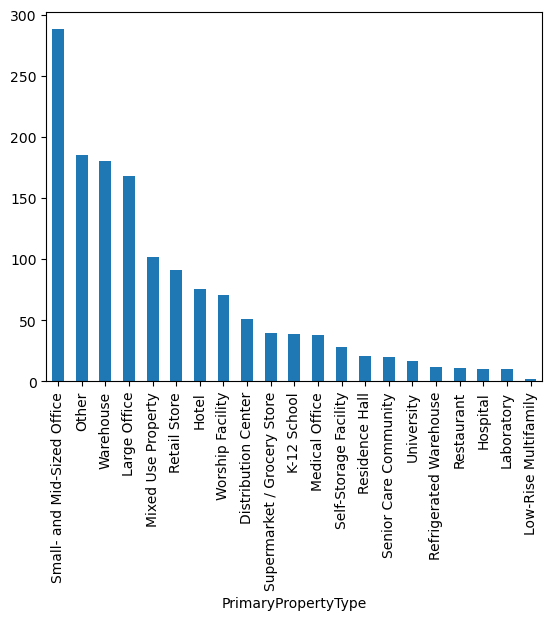

In [26]:
df['PrimaryPropertyType'].value_counts().plot(kind='bar')

In [27]:
list(df['ListOfAllPropertyUseTypes'].unique())

['Hotel',
 'Hotel, Parking, Restaurant',
 'Hotel, Parking, Swimming Pool',
 'Other - Entertainment/Public Assembly',
 'Hotel, Parking',
 'Fitness Center/Health Club/Gym, Office, Swimming Pool',
 'Office, Other, Other - Lodging/Residential, Restaurant, Social/Meeting Hall',
 'Courthouse',
 'Other',
 'College/University',
 'Automobile Dealership',
 'Hotel, Parking, Retail Store, Swimming Pool',
 'K-12 School, Multifamily Housing, Office, Other - Entertainment/Public Assembly',
 'Self-Storage Facility',
 'Non-Refrigerated Warehouse, Office, Refrigerated Warehouse',
 'Non-Refrigerated Warehouse, Office',
 'Office, Other - Education',
 'K-12 School',
 'Office, Self-Storage Facility, Vocational School',
 'Data Center, Office, Retail Store',
 'Other - Mall, Personal Services (Health/Beauty, Dry Cleaning, etc)',
 'Office, Retail Store',
 'Office, Other - Entertainment/Public Assembly, Restaurant',
 'Hotel, Parking, Restaurant, Retail Store',
 'Hotel, Other - Entertainment/Public Assembly, Reta

In [28]:
df['ListOfAllPropertyUseTypes']

0                                                   Hotel
1                              Hotel, Parking, Restaurant
2                                                   Hotel
3                                                   Hotel
4                           Hotel, Parking, Swimming Pool
                              ...                        
3338                           Non-Refrigerated Warehouse
3339                                               Office
3340                                   Other - Recreation
3347                                 K-12 School, Parking
3356    Data Center, Laboratory, Museum, Office, Other...
Name: ListOfAllPropertyUseTypes, Length: 1460, dtype: object

# II. Mise en forme & Nettoyage des données

A réaliser : 
- Une analyse descriptive des données, y compris une explication du sens des colonnes gardées, des arguments derrière la suppression de lignes ou de colonnes, des statistiques descriptives et des visualisations pertinentes.

Quelques pistes d'analyse : 

* Identifier les colonnes avec une majorité de valeurs manquantes ou constantes en utilisant la méthode value_counts() de Pandas
* Mettre en evidence les différences entre les immeubles mono et multi-usages
* Utiliser des pairplots et des boxplots pour faire ressortir les outliers ou des batiments avec des valeurs peu cohérentes d'un point de vue métier 

Pour vous inspirer, ou comprendre l'esprit recherché dans une analyse exploratoire, vous pouvez consulter ce notebook en ligne : https://www.kaggle.com/code/pmarcelino/comprehensive-data-exploration-with-python. Il ne s'agit pas d'un modèle à suivre à la lettre ni d'un template d'analyses attendues pour ce projet. 

## II. 1. Préparation au feature engineering

### II. 1. a) Traitement du contenu de la colonne 'ListOfAllPropertyUseTypes'

#### - Création de colonnes plus facilement exploitables : 'parsed', 'parsed_simple', 'parsed_simple_grouped'

In [29]:
# Création d’une fonction pour séparer les éléments d’une chaîne 
# en utilisant uniquement les virgules qui se trouvent en dehors des parenthèses

def split_outside_parentheses(s): 
    # traitement des NaN 
    if pd.isna(s):
        return [] # -> retourne des listes vides pour les NaN

    items = []    # initialisation de la liste finale qui contiendra chaque élément séparé
    current = []  # initialisation de la liste temporaire pour construire un élément caractère par caractère
    depth = 0  # profondeur des parenthèses (on veut distinguer les caractères à l'intérieur/extérieur d'une parenthèse)

    for char in s:
        if char == '(':      # Dès identification de l'ouverture d'une parenthèse...
            depth += 1       # ... on indique à l'algorithme que l'on gagne +1 en profondeur
        elif char == ')':
            depth -= 1       # permet d'indiquer que l'on est sorti d'une parenthèse

        if char == ',' and depth == 0:             # cas n°1 : si l'on rencontre une virgule en dehors d'une parenthèse (ie. lorsque depth = 0)...
            items.append(''.join(current).strip()) # ...alors on prend tous les éléments de la liste et les colle ensemble en une seule chaîne de caractères (qu'on range dans 'items')
            current = []                           # avant de réinitialiser la liste temporaire 'current'

        else:                                      # cas n°2 : tant que les deux conditions ('depth=0' ET 'rencontrer une virgule') ne sont PAS remplies (voir cas n°1)...
            current.append(char)                   # ...chaque caractère est ajouté systématiquement à la liste 'current' 

    # dernier élément
    if current:                                    # le dernier élément n'est pas encore intégré dans 'items'
        items.append(''.join(current).strip())     # alors on rassemble tous les caractères de 'current' pour constituer le dernier élément, qui est ajouté à 'items'
    return items

df['parsed'] = df['ListOfAllPropertyUseTypes'].apply(split_outside_parentheses)

In [30]:
# Test pour vérifier la fonction créée
split_outside_parentheses("Other - Mall, Personal Services (Health/Beauty, Dry Cleaning, etc)") 

['Other - Mall', 'Personal Services (Health/Beauty, Dry Cleaning, etc)']

In [31]:
# Création d'une fonction qui ne garde que les parties non contenues dans des parenthèses
def simplify(label):
    # Si le label commence par 'Other', garder juste 'Other'
    if label.strip().startswith('Other'):
        return 'Other'
    # Sinon, enlever tout ce qui est entre parenthèses
    return label.split('(')[0].strip()

df['parsed_simple'] = df['parsed'].apply(
    lambda lst: [simplify(x) for x in lst]
)

In [32]:
# Tests pour vérifier la fonction de simplification

simplify("Other - Mall, Personal Services (Health/Beauty, Dry Cleaning, etc)") # simplifié car commence par 'Other'

'Other'

In [33]:
simplify("Hospital (General Medical & Surgical), Parking") # simplifié car comporte une ouverture de parenthèse '('

'Hospital'

In [34]:
# Création d'une colonne comptant les différents types d'usage des bâtiments

df['n_use_types'] = df['parsed_simple'].apply(
    lambda x: len([e for e in x if e]) if isinstance(x, list) else 0
)


In [35]:
df

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

         City State  ZipCode TaxParcelIdentificationNumber  \
0     Seattle    WA  98101.0                    0659000030   
1     Seattle    WA  98101.0                    0659000220   
2     Seattle    WA  98101.0                    0659000475   
3     Seattle    WA  98101.0                    0659000640   
4     Seattle    WA  98121.0                    0659000970   
...       ...   ...      ...                           ...   
3338  Seattle    WA  98108.0                    2824049007   
3339  Seattle    WA  98108.0                    2824049007   
3340  Seattle    WA  98155.0                    0225049062   
3347  Seattle    WA  98144.0                    7548300840   
3356  Seattle    WA  98109.0                    4088803385   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
0                       7          DOWNTOWN  47.61220 -122.33799       1927   
1                       7          DOWNTOWN  47.61317 -122.33393       1996   
2                       7          DOWNTOWN  47.61393 -122.33810       1969   
3                       7          DOWNTOWN  47.61412 -122.33664       1926   
4                       7          DOWNTOWN  47.61375 -122.34047       1980   
...                   ...               ...       ...        ...        ...   
3338                    2  GREATER DUWAMISH  47.54425 -122.31776       1955   
3339                    2  GREATER DUWAMISH  47.53161 -122.29944       1929   
3340                    4         NORTHEAST  47.68109 -122.26180       2013   
3347                    3  GREATER DUWAMISH  47.58831 -122.30650       2015   
3356                    7        LAKE UNION  47.62497 -122.33883       2015   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580            

In [36]:
# Affichage des types d'usage ainsi que leur compte
with pd.option_context('display.max_rows', None, 'display.max_rows', None):
    display(df['parsed_simple'].explode().value_counts())

parsed_simple
Office                                        692
Parking                                       406
Other                                         281
Retail Store                                  250
Non-Refrigerated Warehouse                    245
Restaurant                                     98
Hotel                                          81
Worship Facility                               76
Distribution Center                            61
Medical Office                                 61
Supermarket/Grocery Store                      54
K-12 School                                    46
Multifamily Housing                            37
Data Center                                    36
Self-Storage Facility                          35
Residence Hall/Dormitory                       23
Laboratory                                     22
Senior Care Community                          20
Bank Branch                                    19
College/University                  

In [37]:
# Simplification des catégories par fréquence

freq = df['parsed_simple'].explode().value_counts()

seuil = 0.02 * freq.sum() # on prend un seuil à 2% du nombre total de labels
seuil

55.120000000000005

In [38]:
rare_categ = freq[freq < seuil].index # on filtre tous les index dont la fréquence est en-dessous du seuil fixé

# Création d'une nouvelle colonne avec les catégories rares regroupées dans 'Other'
df['parsed_simple_grouped'] = df['parsed_simple'].apply(
    lambda lst: [
        x if x not in rare_categ 
        else 'Other'
        for x in lst
    ]
)

# Vérification
df['parsed_simple_grouped'].explode().value_counts()

parsed_simple_grouped
Other                         786
Office                        692
Parking                       406
Retail Store                  250
Non-Refrigerated Warehouse    245
Restaurant                     98
Hotel                          81
Worship Facility               76
Medical Office                 61
Distribution Center            61
Name: count, dtype: int64

#### - Encodage avec le MultiLabelBinarizer

In [39]:
import sklearn
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()

encoded = pd.DataFrame(
    mlb.fit_transform(df['parsed_simple_grouped']),
    columns=mlb.classes_,
    index=df.index
)

df = pd.concat([df, encoded], axis=1)


In [40]:
encoded

Distribution Center  Hotel  Medical Office  Non-Refrigerated Warehouse  \
0                       0      1               0                           0   
1                       0      1               0                           0   
2                       0      1               0                           0   
3                       0      1               0                           0   
4                       0      1               0                           0   
...                   ...    ...             ...                         ...   
3338                    0      0               0                           1   
3339                    0      0               0                           0   
3340                    0      0               0                           0   
3347                    0      0               0                           0   
3356                    0      0               0                           0   

      Office  Other  Parking  Restaurant  Retail Store  Worship Facility  
0          0      0        0           0             0                 0  
1          0      0        1           1             0                 0  
2          0      0        0           0             0                 0  
3          0      0        0           0             0                 0  
4          0      1        1           0             0                 0  
...      ...    ...      ...         ...           ...               ...  
3338       0      0        0           0             0                 0  
3339       1      0        0           0             0                 0  
3340       0      1        0           0             0                 0  
3347       0      1        1           0             0                 0  
3356       1      1        1           0             0                 0  

[1460 rows x 10 columns]

In [41]:
df.shape

(1460, 60)

In [42]:
df[['ListOfAllPropertyUseTypes', 'parsed', 'parsed_simple']].head(50)


ListOfAllPropertyUseTypes  \
0                                               Hotel   
1                          Hotel, Parking, Restaurant   
2                                               Hotel   
3                                               Hotel   
4                       Hotel, Parking, Swimming Pool   
6                                               Hotel   
7               Other - Entertainment/Public Assembly   
8                                               Hotel   
10                                              Hotel   
11                                              Hotel   
12                                              Hotel   
13                                     Hotel, Parking   
14                                     Hotel, Parking   
16  Fitness Center/Health Club/Gym, Office, Swimmi...   
17                                     Hotel, Parking   
18  Office, Other, Other - Lodging/Residential, Re...   
19                                              Hotel   
20                                         Courthouse   
21                                              Other   
23                                     Hotel, Parking   
24                                 College/University   
25                              Automobile Dealership   
26        Hotel, Parking, Retail Store, Swimming Pool   
27                                              Hotel   
29                                              Hotel   
32  K-12 School, Multifamily Housing, Office, Othe...   
33                                              Hotel   
34                              Self-Storage Facility   
36  Non-Refrigerated Warehouse, Office, Refrigerat...   
39                 Non-Refrigerated Warehouse, Office   
40                          Office, Other - Education   
41                                        K-12 School   
42   Office, Self-Storage Facility, Vocational School   
43                                              Hotel   
44                  Data Center, Office, Retail Store   
45  Other - Mall, Personal Services (Health/Beauty...   
46                               Office, Retail Store   
47  Office, Other - Entertainment/Public Assembly,...   
48                         Hotel, Parking, Restaurant   
49                      Hotel, Parking, Swimming Pool   
50           Hotel, Parking, Restaurant, Retail Store   
51  Hotel, Other - Entertainment/Public Assembly, ...   
52                                     Hotel, Parking   
53                                              Hotel   
54                                              Hotel   
55                                              Hotel   
56                                        K-12 School   
57                                     Hotel, Parking   
58                                             Office   
59                     Parking, Senior Care Community   

                                               parsed  \
0                                             [Hotel]   
1                        [Hotel, Parking, Restaurant]   
2                                             [Hotel]   
3                                             [Hotel]   
4                     [Hotel, Parking, Swimming Pool]   
6                                             [Hotel]   
7             [Other - Entertainment/Public Assembly]   
8                                             [Hotel]   
10                                            [Hotel]   
11                                            [Hotel]   
12                                            [Hotel]   
13                                   [Hotel, Parking]   
14                                   [Hotel, Parking]   
16  [Fitness Center/Health Club/Gym, Office, Swimm...   
17                                   [Hotel, Parking]   
18  [Office, Other, Other - Lodging/Residential, R...   
19                                            [Hotel]   
20                                       [Courthouse]   
21                                   

### II. 1. b) Diverses explorations

In [43]:
df[df['n_use_types']<3].shape

(1148, 60)

In [44]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):

    summary_df = pd.DataFrame({
        'count': encoded.sum(),
        'percentage': round(100 * encoded.sum() / len(encoded),1)
    }).sort_values('count', ascending=False)

    display(summary_df)


count  percentage
Office                        692        47.4
Other                         639        43.8
Parking                       406        27.8
Retail Store                  250        17.1
Non-Refrigerated Warehouse    245        16.8
Restaurant                     98         6.7
Hotel                          81         5.5
Worship Facility               76         5.2
Distribution Center            61         4.2
Medical Office                 61         4.2

In [45]:
encoded.shape

(1460, 10)

In [46]:
df.shape

(1460, 60)

In [47]:
df

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

         City State  ZipCode TaxParcelIdentificationNumber  \
0     Seattle    WA  98101.0                    0659000030   
1     Seattle    WA  98101.0                    0659000220   
2     Seattle    WA  98101.0                    0659000475   
3     Seattle    WA  98101.0                    0659000640   
4     Seattle    WA  98121.0                    0659000970   
...       ...   ...      ...                           ...   
3338  Seattle    WA  98108.0                    2824049007   
3339  Seattle    WA  98108.0                    2824049007   
3340  Seattle    WA  98155.0                    0225049062   
3347  Seattle    WA  98144.0                    7548300840   
3356  Seattle    WA  98109.0                    4088803385   

      CouncilDistrictCode      Neighborhood  Latitude  Longitude  YearBuilt  \
0                       7          DOWNTOWN  47.61220 -122.33799       1927   
1                       7          DOWNTOWN  47.61317 -122.33393       1996   
2                       7          DOWNTOWN  47.61393 -122.33810       1969   
3                       7          DOWNTOWN  47.61412 -122.33664       1926   
4                       7          DOWNTOWN  47.61375 -122.34047       1980   
...                   ...               ...       ...        ...        ...   
3338                    2  GREATER DUWAMISH  47.54425 -122.31776       1955   
3339                    2  GREATER DUWAMISH  47.53161 -122.29944       1929   
3340                    4         NORTHEAST  47.68109 -122.26180       2013   
3347                    3  GREATER DUWAMISH  47.58831 -122.30650       2015   
3356                    7        LAKE UNION  47.62497 -122.33883       2015   

      NumberofBuildings  NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                   1.0              12             88434                   0   
1                   1.0              11            103566               15064   
2                   1.0              41            956110              196718   
3                   1.0              10             61320                   0   
4                   1.0              18            175580            

La colonne DataYear indique déjà qu'elle ne contient que la valeur '2016' avec un écart-type de 0 et un min = max = 2016. 

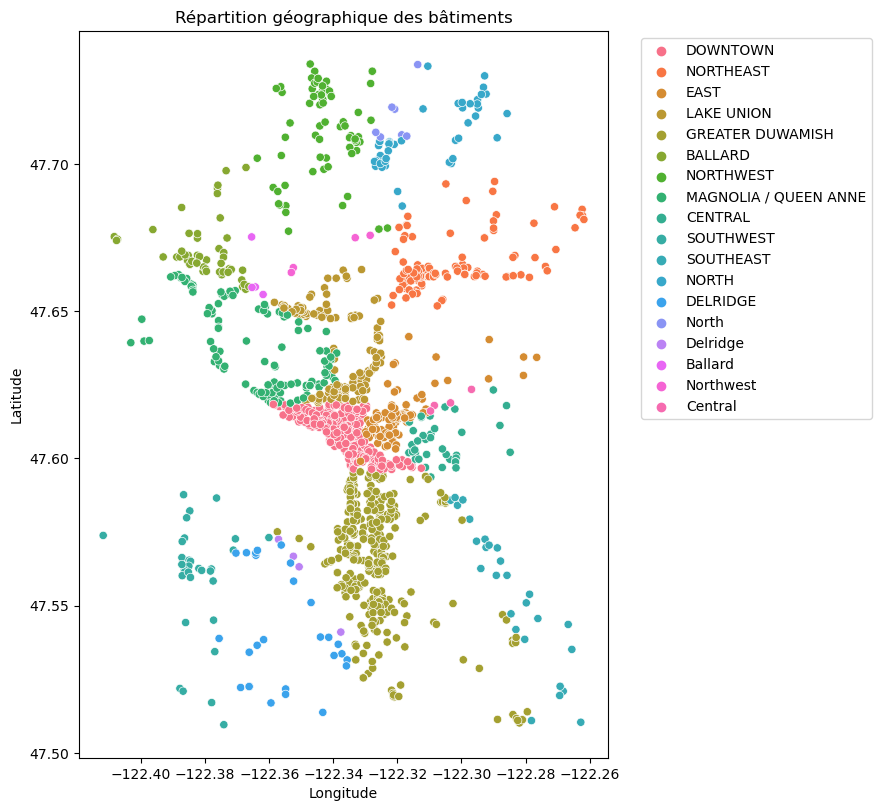

In [48]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 8))
sns.scatterplot(
    data=df,
    x='Longitude',
    y='Latitude',
    hue='Neighborhood'
)

plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)
plt.tight_layout()
plt.title('Répartition géographique des bâtiments')
plt.show()


### II. 2. c) Correlation Heatmap

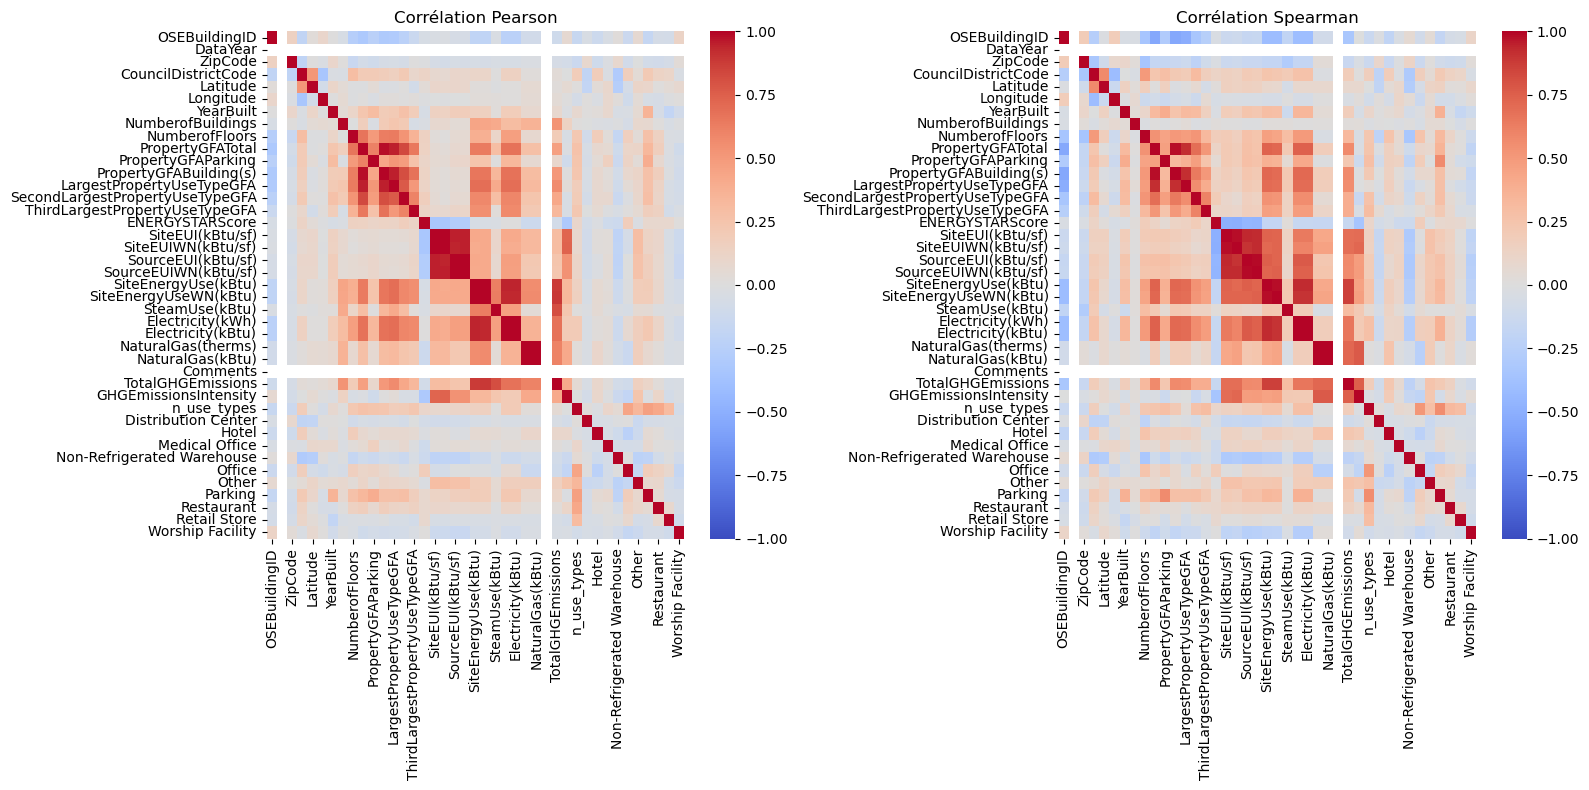

In [49]:
numeric_cols = df.select_dtypes(include='number')
corr_matrix_pearson = numeric_cols.corr()
corr_matrix_spearman = numeric_cols.corr(method='spearman')

fig, axes = plt.subplots(1, 2, figsize=(16, 8))  # 1 ligne, 2 colonnes

# Heatmap Pearson
sns.heatmap(corr_matrix_pearson, annot=False, cmap="coolwarm", cbar=True, vmin=-1, vmax=1, ax=axes[0])
axes[0].set_title("Corrélation Pearson")

# Heatmap Spearman
sns.heatmap(corr_matrix_spearman, annot=False, cmap="coolwarm", cbar=True, vmin=-1, vmax=1, ax=axes[1])
axes[1].set_title("Corrélation Spearman")

plt.tight_layout()
plt.show()

## II. 2. Préparation des features pour la modélisation

A réaliser :
* Si ce n'est pas déjà fait, supprimer toutes les colonnes peu pertinentes pour la modélisation.
* Tracer la distribution de la cible pour vous familiariser avec l'ordre de grandeur. En cas d'outliers, mettez en place une démarche pour les supprimer.
* Débarrassez-vous des features redondantes en utilisant une matrice de corrélation de Pearson. Pour cela, utiisez la méthode corr() de Pandas, couplé d'un graphique Heatmap de la librairie Seaborn 
* Réalisez différents graphiques pour comprendre le lien entre vos features et la target (boxplots, scatterplots, pairplot si votre nombre de features numériques n'est pas très élevé).
*  Séparez votre jeu de données en un Pandas DataFrame X (ensemble de feautures) et Pandas Series y (votre target).
* Si vous avez des features catégorielles, il faut les encoder pour que votre modèle fonctionne. Les deux méthodes d'encodage à connaitre sont le OneHotEncoder et le LabelEncoder

### II. 2. a) Distribution des variables cibles

In [50]:
numeric_cols

OSEBuildingID  DataYear  ZipCode  CouncilDistrictCode  Latitude  \
0                 1      2016  98101.0                    7  47.61220   
1                 2      2016  98101.0                    7  47.61317   
2                 3      2016  98101.0                    7  47.61393   
3                 5      2016  98101.0                    7  47.61412   
4                 8      2016  98121.0                    7  47.61375   
...             ...       ...      ...                  ...       ...   
3338          50068      2016  98108.0                    2  47.54425   
3339          50069      2016  98108.0                    2  47.53161   
3340          50070      2016  98155.0                    4  47.68109   
3347          50081      2016  98144.0                    3  47.58831   
3356          50094      2016  98109.0                    7  47.62497   

      Longitude  YearBuilt  NumberofBuildings  NumberofFloors  \
0    -122.33799       1927                1.0              12   
1    -122.33393       1996                1.0              11   
2    -122.33810       1969                1.0              41   
3    -122.33664       1926                1.0              10   
4    -122.34047       1980                1.0              18   
...         ...        ...                ...             ...   
3338 -122.31776       1955                1.0               1   
3339 -122.29944       1929                1.0               2   
3340 -122.26180       2013                1.0               1   
3347 -122.30650       2015                1.0               3   
3356 -122.33883       2015                1.0               6   

      PropertyGFATotal  PropertyGFAParking  PropertyGFABuilding(s)  \
0                88434                   0                   88434   
1               103566               15064                   88502   
2               956110              196718                  759392   
3                61320                   0                   61320   
4               175580               62000                  113580   
...                ...                 ...                     ...   
3338             52085                4222                   47863   
3339             24990                   0                   24990   
3340             72000                   0                   72000   
3347             45000                   0                   45000   
3356            345290               85028                  260262   

      LargestPropertyUseTypeGFA  SecondLargestPropertyUseTypeGFA  \
0                       88434.0                              NaN   
1                       83880.0                          15064.0   
2                      756493.0                              NaN   
3                       61320.0                              NaN   
4                      123445.0                          68009.0   
...                         ...                              ...   
3338                    52085.0                              NaN   
3339                    24990.0                              NaN   
3340                    72000.0                              NaN   
3347                    45728.0                              0.0   
3356                   151523.0                         106498.0   

      ThirdLargestPropertyUseTypeGFA  ENERGYSTARScore  SiteEUI(kBtu/sf)  \
0                                NaN             60.0         81.699997   
1                             4622.0             61.0         94.800003   
2                                NaN             43.0         96.000000   
3                                NaN             56.0        110.800003   
4                                0.0             75.0        114.800003   
...                              ...              ...               ...   
3338                             NaN             37.0         69.199997   
3339                             NaN              9.0        176.899994   
3340           

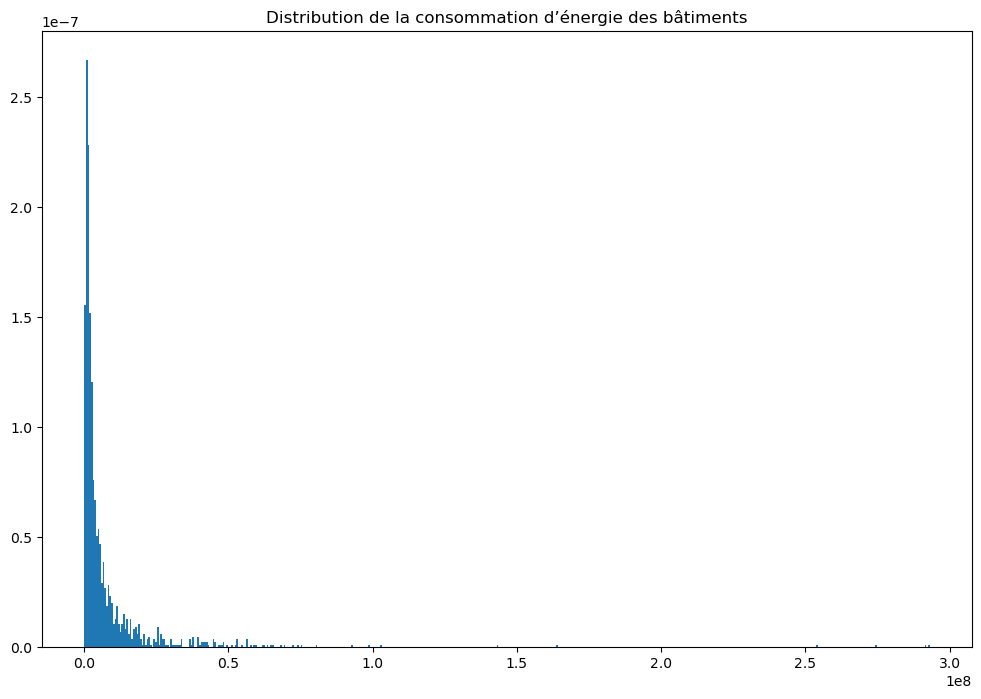

In [51]:
plt.figure(figsize=(12,8))
plt.hist(numeric_cols['SiteEnergyUse(kBtu)'], bins=500, density=True)
plt.title("Distribution de la consommation d’énergie des bâtiments")
plt.show()

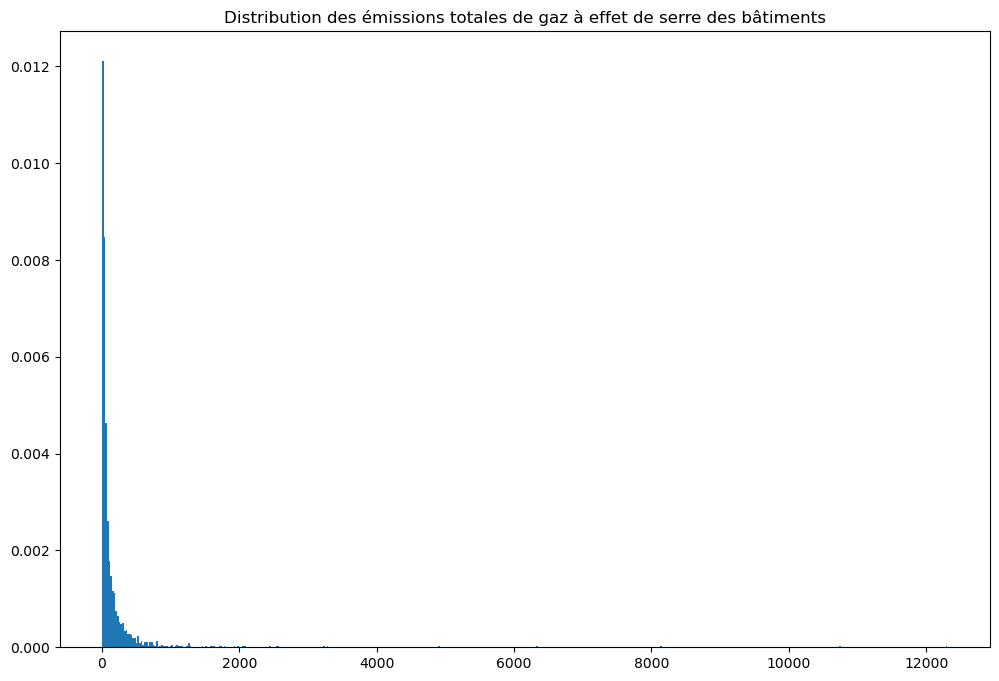

In [52]:
plt.figure(figsize=(12,8))
plt.hist(numeric_cols['TotalGHGEmissions'], bins=500, density=True)
plt.title("Distribution des émissions totales de gaz à effet de serre des bâtiments")
plt.show()

### II. 2. b) Transformation-log des variables cibles

In [53]:
df['log_SiteEnergyUse(kBtu)'] = np.log1p(df['SiteEnergyUse(kBtu)']) # toutes les valeurs sont strictement positives
df['log_TotalGHGEmissions'] = np.log(df['TotalGHGEmissions']+2)

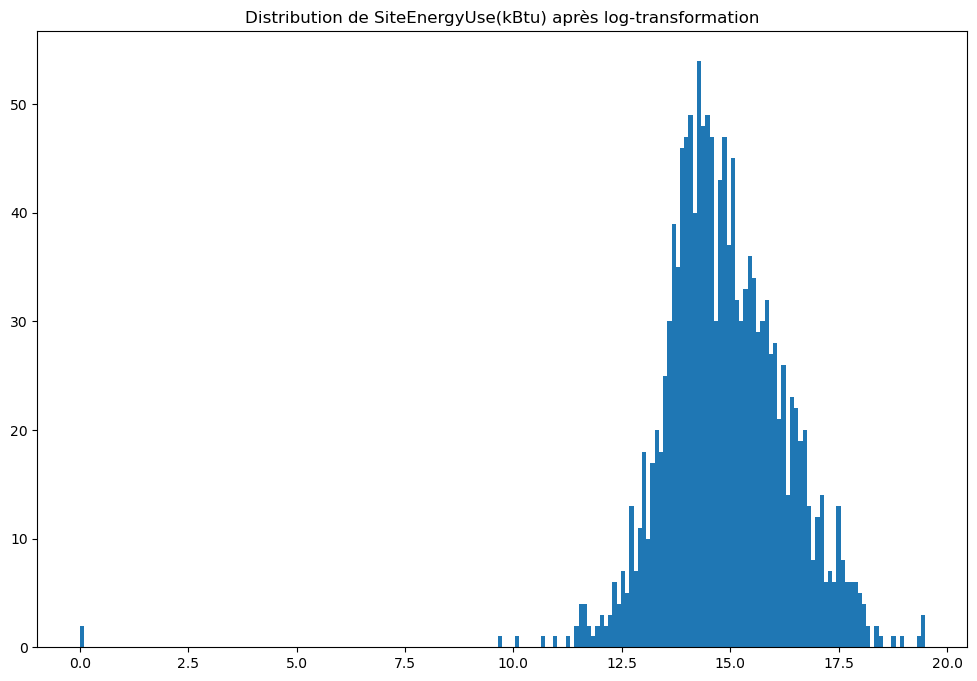

In [54]:
plt.figure(figsize=(12,8))
plt.hist(df['log_SiteEnergyUse(kBtu)'], bins=200)
plt.title("Distribution de SiteEnergyUse(kBtu) après log-transformation")
plt.show()

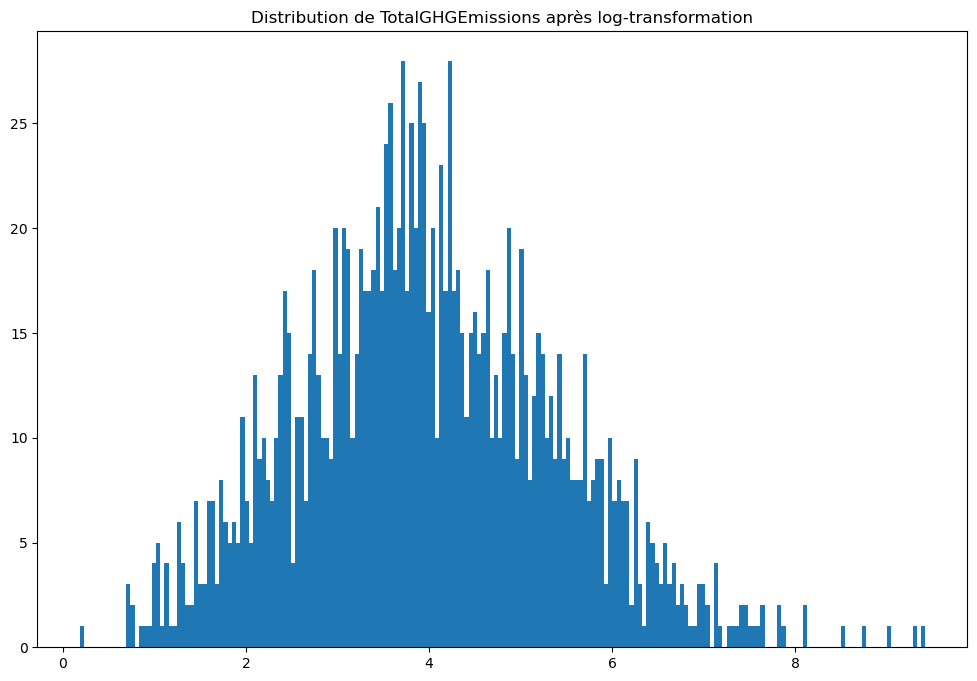

In [55]:
plt.figure(figsize=(12,8))
plt.hist(df['log_TotalGHGEmissions'], bins=200)
plt.title("Distribution de TotalGHGEmissions après log-transformation")
plt.show()

### II. 2. c) Suppression des colonnes redondantes ou peu utiles

In [56]:
df.shape

(1460, 62)

In [57]:
df.drop(columns=['City', # n'affiche que la valeur 'Seattle' donc colonne non pertinente
                 'State', # idem
                 'DefaultData', # l'information apportée est déjà contenue dans la colonne ['ComplianceStatus']
                 'Comments' # ne comporte aucune donnée
                 ], inplace=True)
df.shape

(1460, 58)

In [58]:
df

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3338  98108.0                    2824049007                    2   
3339  98108.0                    2824049007                    2   
3340  98155.0                    0225049062                    4   
3347  98144.0                    7548300840                    3   
3356  98109.0                    4088803385                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN  47.61220 -122.33799       1927                1.0   
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3340         NORTHEAST  47.68109 -122.26180       2013                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   
3356        LAKE UNION  47.62497 -122.33883       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                

# III. Feature Engineering

In [59]:
#Selection
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV, 
    cross_validate,
)
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.inspection import permutation_importance

#Preprocess
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

#Modèles
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor


#### A réaliser : Enrichir le jeu de données actuel avec de nouvelles features issues de celles existantes. 

En règle générale : On utilise la méthode .apply() de Pandas pour créer une nouvelle colonne à partir d'une colonne existante. N'hésitez pas à regarder les exemples dans les chapitres de cours donnés en ressource

Les variables agrégées basées sur les émissions de CO₂ ou la consommation énergétique ont été exclues afin d’éviter toute fuite d’information, ces valeurs n’étant pas disponibles pour les bâtiments à prédire.

In [60]:
df

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3338  98108.0                    2824049007                    2   
3339  98108.0                    2824049007                    2   
3340  98155.0                    0225049062                    4   
3347  98144.0                    7548300840                    3   
3356  98109.0                    4088803385                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN  47.61220 -122.33799       1927                1.0   
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3340         NORTHEAST  47.68109 -122.26180       2013                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   
3356        LAKE UNION  47.62497 -122.33883       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                

## III. 1. Création de variables via du feature engineering

In [61]:
# CODE FEATURE ENGINEERING

import numpy as np
from math import radians, sin, cos, sqrt, asin

# Fonction de division sécurisée pour éviter les inf
def safe_divide(a, b):
    return np.where(b == 0, np.nan, a / b)

# -------------------------
# A. Géographie
# -------------------------

## A.Distance au centre-ville
### Coordonnées du centre-ville de Seattle
Downtown_lat = 47.6062
Downtown_lon = -122.3321

def haversine_vec(lat1, lon1, lat2, lon2):
    R = 6371
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat/2)**2 + np.cos(lat1)*np.cos(lat2)*np.sin(dlon/2)**2
    return 2 * R * np.arcsin(np.sqrt(a))

df["Dist_to_Downtown_km"] = haversine_vec(df['Latitude'],
                                          df['Longitude'],
                                          Downtown_lat,
                                          Downtown_lon)

# -------------------------
# B. Caractéristiques structurelles des bâtiments
# -------------------------

## B.1. Âge du bâtiment
df['Building_Age'] = df['DataYear'] - df['YearBuilt']

## B.2. Superficie par étage
df['GFAPerFloors'] = safe_divide(df['PropertyGFATotal'], df['NumberofFloors'])

## B.3. % occupé par le parking
df['PctGFAParking'] = safe_divide(df['PropertyGFAParking'], df['PropertyGFATotal'])

## B.4. Source d'énergie
df['Has_Electricity'] = np.where(
    df['Electricity(kBtu)'].notna() & (df['Electricity(kBtu)'] > 0)
    ,1,0)

df['Has_NaturalGas'] = np.where(
    df['NaturalGas(kBtu)'].notna() & (df['NaturalGas(kBtu)'] > 0)
    ,1,0)

df['Has_Steam'] = np.where(
    df['SteamUse(kBtu)'].notna() & (df['SteamUse(kBtu)'] > 0)
    ,1,0)

# -------------------------
# C. Usage des bâtiments
# -------------------------

## C.1. Bâtiments mono ou multi-usage
df['MonoMultiUsage'] = np.where(
    df['SecondLargestPropertyUseType'].isna() & df['ThirdLargestPropertyUseType'].isna() # les conditions : pas d'usage secondaire ou tertiaire autre que l'usage principal
    ,'mono' # valeur si les conditions sont remplies (ie bâtiment mono-usage)
    ,'multi' # valeur sinon (bâtiment multi-usage)
    )

## C.2. Ratios d'usages primaire et secondaire
df['PrimaryUseRatio'] = df['LargestPropertyUseTypeGFA'] / df['PropertyGFATotal'].replace(0, np.nan)
df['SecondaryUseRatio'] = df['SecondLargestPropertyUseTypeGFA'] / df['PropertyGFATotal'].replace(0, np.nan)


#### df.shape

In [62]:
df

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3338  98108.0                    2824049007                    2   
3339  98108.0                    2824049007                    2   
3340  98155.0                    0225049062                    4   
3347  98144.0                    7548300840                    3   
3356  98109.0                    4088803385                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN  47.61220 -122.33799       1927                1.0   
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3340         NORTHEAST  47.68109 -122.26180       2013                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   
3356        LAKE UNION  47.62497 -122.33883       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                

In [63]:
# Suppression des colonnes non pertinentes pour la problématique (afin d'éviter le data leakage)

leakage_cols = [
    'SiteEnergyUseWN(kBtu)',
    'SiteEUI(kBtu/sf)',
    'SiteEUIWN(kBtu/sf)',
    'SourceEUI(kBtu/sf)',
    'SourceEUIWN(kBtu/sf)',
    'Electricity(kWh)',
    'Electricity(kBtu)',
    'NaturalGas(therms)',
    'NaturalGas(kBtu)',
    'SteamUse(kBtu)',
    'GHGEmissionsIntensity'
]

df_clean = df.drop(columns=leakage_cols)


In [64]:
df_clean.shape

(1460, 57)

In [65]:
df_clean.info

<bound method DataFrame.info of       OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                               

In [66]:
df_clean.describe()

OSEBuildingID  DataYear       ZipCode  CouncilDistrictCode  \
count    1460.000000    1460.0   1460.000000          1460.000000   
mean    16105.348630    2016.0  98116.597260             4.423288   
std     13335.196101       0.0     18.672664             2.190766   
min         1.000000    2016.0  98006.000000             1.000000   
25%       609.750000    2016.0  98104.000000             2.000000   
50%     21140.500000    2016.0  98109.000000             4.000000   
75%     24567.000000    2016.0  98125.000000             7.000000   
max     50094.000000    2016.0  98199.000000             7.000000   

          Latitude    Longitude    YearBuilt  NumberofBuildings  \
count  1460.000000  1460.000000  1460.000000        1458.000000   
mean     47.616115  -122.333457  1960.843836           1.034294   
std       0.046616     0.023011    32.966330           0.540904   
min      47.509590  -122.411820  1900.000000           0.000000   
25%      47.587855  -122.342335  1929.000000           1.000000   
50%      47.612420  -122.333195  1965.000000           1.000000   
75%      47.648868  -122.322845  1988.000000           1.000000   
max      47.733870  -122.261800  2015.000000           9.000000   

       NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
count     1460.000000      1.460000e+03         1460.000000   
mean         4.370548      1.130373e+05        14255.386986   
std          6.763737      1.923444e+05        44390.587398   
min          0.000000      1.630000e+04            0.000000   
25%          1.000000      2.916050e+04            0.000000   
50%          3.000000      4.800350e+04            0.000000   
75%          5.000000      1.041622e+05            0.000000   
max         99.000000      1.952220e+06       512608.000000   

       PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
count            1.460000e+03               1.454000e+03   
mean             9.878188e+04               9.124103e+04   
std              1.688767e+05               1.562497e+05   
min              3.636000e+03               5.656000e+03   
25%              2.814350e+04               2.521550e+04   
50%              4.591200e+04               4.166800e+04   
75%              9.383225e+04               8.978975e+04   
max              1.765970e+06               1.680937e+06   

       SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
count                       796.000000                      315.000000   
mean                      36543.462685                    14124.479995   
std                       67534.992572                    29053.931157   
min                           0.000000                        0.000000   
25%                        5276.000000                     3000.000000   
50%                       12280.500000                     6000.000000   
75%                       31935.750000                    13173.500000   
max                      686750.000000                   303910.000000   

       ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  n_use_types  \
count       995.000000         1.458000e+03        1458.000000  1460.000000   
mean         63.862312         7.743262e+06         166.340947     1.887671   
std          28.917564         1.909175e+07         586.106337     1.120431   
min           1.000000         0.000000e+00          -0.800000     0.000000   
25%          44.000000         1.201677e+06          18.912500     1.000000   
50%          71.000000         2.598999e+06          47.055000     2.000000   
75%          89.000000         6.950048e+06         133.560000     2.000000   
max         100.000000         2.930908e+08       12307.160000    11.000000   

       Distribution Center        Hotel  Medical Office  \
count          1460.000000  1460.000000     1460.000000   
mean              0.041781     0.055479        0.041781   
std               0.200157     0.228992        0.200157   
min               0.000000     0.000000        0.000000  

In [67]:
df_clean['Dist_to_dtown_bin'] = pd.qcut(
    df_clean['Dist_to_Downtown_km'],
    q=4,
    labels=['0–1.6 km', '1.6–3.7 km', '3.7–7.1 km', '7.1+ km']
)

In [68]:
df_clean['Building_Age_bin'] = pd.cut(df_clean['Building_Age'], 
                                      bins = [0, 20, 50, 80, 200], 
                                      labels = ['<20', '20–50', '50–80', '80+'])

In [69]:
df_clean

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3338  98108.0                    2824049007                    2   
3339  98108.0                    2824049007                    2   
3340  98155.0                    0225049062                    4   
3347  98144.0                    7548300840                    3   
3356  98109.0                    4088803385                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN  47.61220 -122.33799       1927                1.0   
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3340         NORTHEAST  47.68109 -122.26180       2013                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   
3356        LAKE UNION  47.62497 -122.33883       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                

In [70]:
df_clean['Dist_to_dtown_bin'].value_counts()

Dist_to_dtown_bin
0–1.6 km      365
1.6–3.7 km    365
3.7–7.1 km    365
7.1+ km       365
Name: count, dtype: int64

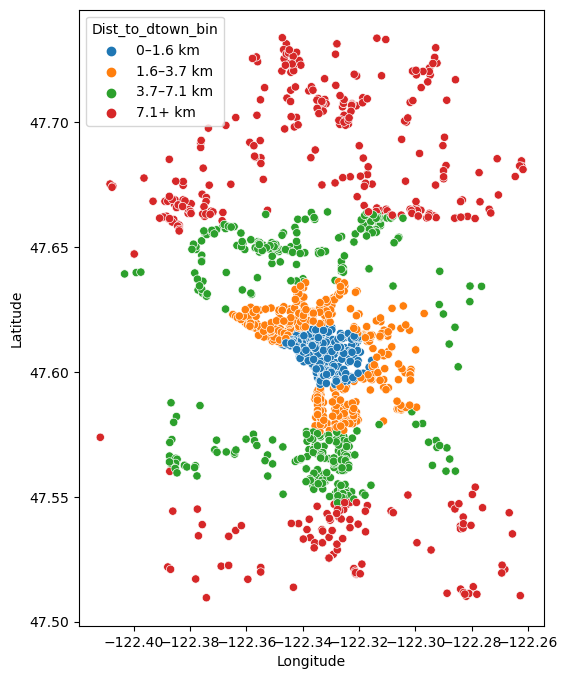

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 8))
sns.scatterplot(
    data=df_clean,
    x='Longitude',
    y='Latitude',
    hue='Dist_to_dtown_bin'
)

plt.show()


In [72]:
## B.1.a) Âge du bâtiment
df_clean['Building_Age'].value_counts()

Building_Age
116    43
106    31
16     30
37     29
46     28
       ..
113     2
80      1
72      1
81      1
77      1
Name: count, Length: 113, dtype: int64

In [73]:
## B.1.b) Classe d'âge du bâtiment
df_clean['Building_Age_bin'].value_counts()

Building_Age_bin
20–50    440
80+      405
50–80    335
<20      280
Name: count, dtype: int64

<Axes: xlabel='Building_Age_bin'>

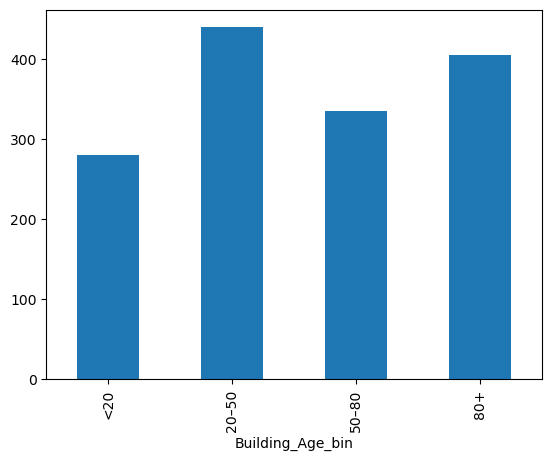

In [74]:
df_clean['Building_Age_bin'].value_counts().sort_index().plot(kind='bar')

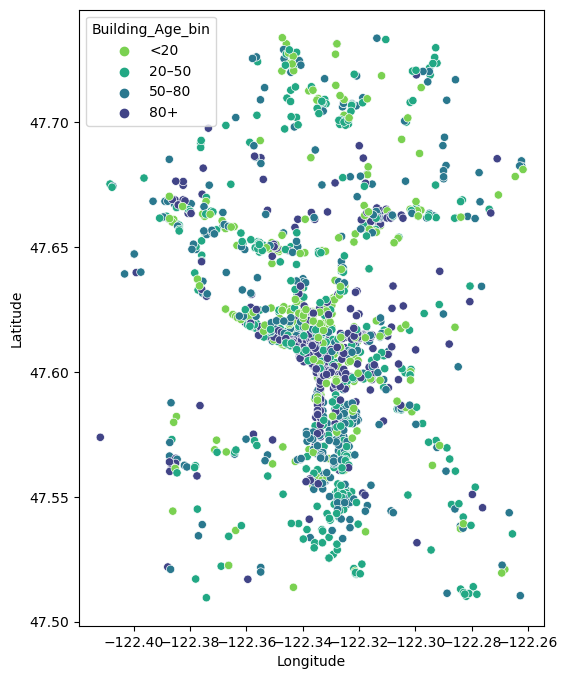

In [75]:
## B.1.c) Répartition géographique des classes d'âge de bâtiments

import matplotlib.pyplot as plt
import seaborn as sns

order = ["<20", "20–50", "50–80", "80+"] # pour avoir un dégradé fluide de couleurs

plt.figure(figsize=(6, 8))
sns.scatterplot(
    data=df_clean,
    x='Longitude',
    y='Latitude',
    hue='Building_Age_bin',
    hue_order=order,
    palette="viridis_r"  
)

plt.show()



### III. 3. Visualisation des colonnes

In [76]:
with pd.option_context('display.max_columns', None, 'display.max_rows', None):
    info_df = pd.DataFrame({
        'non_null_count': df_clean.notnull().sum(),
        'missing_pct': 100 * (1 - df_clean.notnull().sum() / len(df_clean)),
        'dtype': df_clean.dtypes.astype(str)
    })

    display(info_df.sort_values('missing_pct', ascending=False))


non_null_count  missing_pct     dtype
Outlier                                      15    98.972603    object
YearsENERGYSTARCertified                     90    93.835616    object
ThirdLargestPropertyUseType                 315    78.424658    object
ThirdLargestPropertyUseTypeGFA              315    78.424658   float64
SecondLargestPropertyUseType                796    45.479452    object
SecondLargestPropertyUseTypeGFA             796    45.479452   float64
SecondaryUseRatio                           796    45.479452   float64
ENERGYSTARScore                             995    31.849315   float64
GFAPerFloors                               1447     0.890411   float64
LargestPropertyUseTypeGFA                  1454     0.410959   float64
LargestPropertyUseType                     1454     0.410959    object
PrimaryUseRatio                            1454     0.410959   float64
log_TotalGHGEmissions                      1458     0.136986   float64
log_SiteEnergyUse(kBtu)                    1458     0.136986   float64
ListOfAllPropertyUseTypes                  1458     0.136986    object
SiteEnergyUse(kBtu)                        1458     0.136986   float64
TotalGHGEmissions                          1458     0.136986   float64
NumberofBuildings                          1458     0.136986   float64
Office                                     1460     0.000000     int64
Restaurant                                 1460     0.000000     int64
Parking                                    1460     0.000000     int64
Non-Refrigerated Warehouse                 1460     0.000000     int64
Other                                      1460     0.000000     int64
Retail Store                               1460     0.000000     int64
Hotel                                      1460     0.000000     int64
Worship Facility                           1460     0.000000     int64
Dist_to_Downtown_km                        1460     0.000000   float64
Building_Age                               1460     0.000000     int64
PctGFAParking                              1460     0.000000   float64
Has_Electricity                            1460     0.000000     int64
Has_NaturalGas                             1460     0.000000     int64
Has_Steam                                  1460     0.000000     int64
MonoMultiUsage                             1460     0.000000    object
Dist_to_dtown_bin                          1460     0.000000  category
Medical Office                             1460     0.000000     int64
OSEBuildingID                              1460     0.000000     int64
Distribution Center                        1460     0.000000     int64
Longitude                                  1460     0.000000   float64
BuildingType                               1460     0.000000    object
PrimaryPropertyType                        1460     0.000000    object
PropertyName                               1460     0.000000    object
Address                                    1460     0.000000    object
ZipCode                                    1460     0.000000   float64
TaxParcelIdentificationNumber              1460     0.000000    object
CouncilDistrictCode                        1460     0.000000     int64
Neighborhood                               1460     0.000000    object
Latitude                                   1460     0.000000   float64
YearBuilt                                  1460     0.000000     int64
parsed_simple_grouped                      1460     0.000000    object
NumberofFloors                             1460     0.000000     int64
PropertyGFATotal                           1460     0.000000     int64
PropertyGFAParking                         1460     0.000000     int64
PropertyGFABuilding(s)                     1460     0.000000     int64
ComplianceStatus                           1460     0.000000    object
DataYear                                   1460     0.000000     int64
parsed                                     1460     0.000

In [77]:
# Colonnes catégoriques
categ_cols = df_clean.select_dtypes(include=['object']).copy()

# Colonnes numériques
numeric_cols = df_clean.select_dtypes(include=['int64','float64']).copy()

# Connaître le nombre de valeurs uniques dans chaque colonne catégorielle
for col in categ_cols.columns:
    try:
        n = categ_cols[col].nunique()
        print(f"{col}: {n} valeurs uniques\n")
    except TypeError:
        print(f"{col}: ignoré (non-hashable)\n")

BuildingType: 1 valeurs uniques

PrimaryPropertyType: 21 valeurs uniques

PropertyName: 1457 valeurs uniques

Address: 1445 valeurs uniques

TaxParcelIdentificationNumber: 1399 valeurs uniques

Neighborhood: 18 valeurs uniques

ListOfAllPropertyUseTypes: 337 valeurs uniques

LargestPropertyUseType: 51 valeurs uniques

SecondLargestPropertyUseType: 45 valeurs uniques

ThirdLargestPropertyUseType: 38 valeurs uniques

YearsENERGYSTARCertified: 63 valeurs uniques

ComplianceStatus: 4 valeurs uniques

Outlier: 2 valeurs uniques

parsed: ignoré (non-hashable)

parsed_simple: ignoré (non-hashable)

parsed_simple_grouped: ignoré (non-hashable)

MonoMultiUsage: 2 valeurs uniques



#### II. 3. a) Colonnes catégorielles

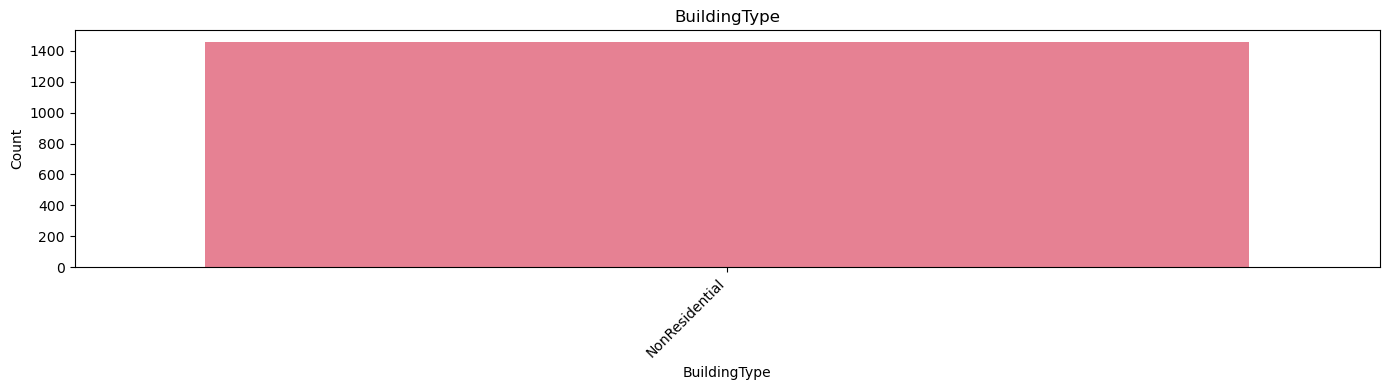

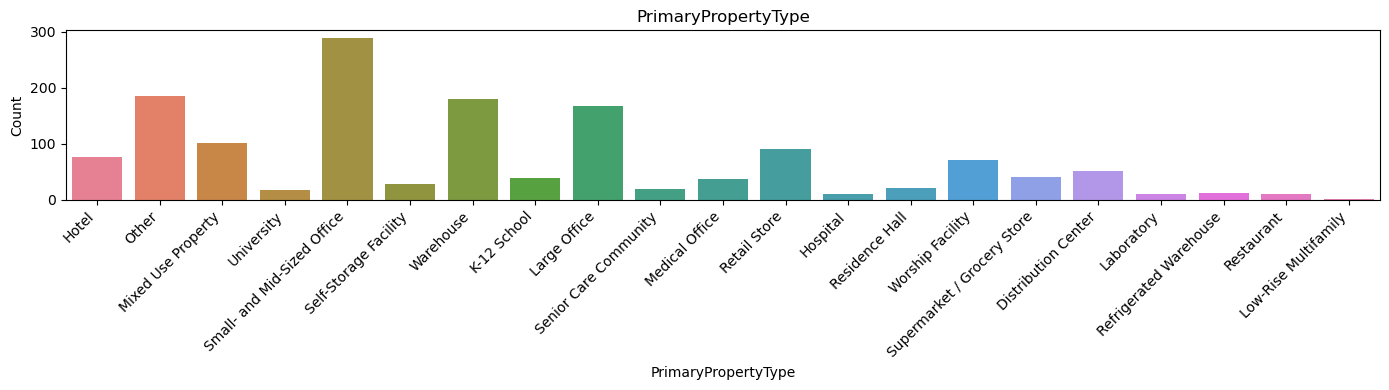

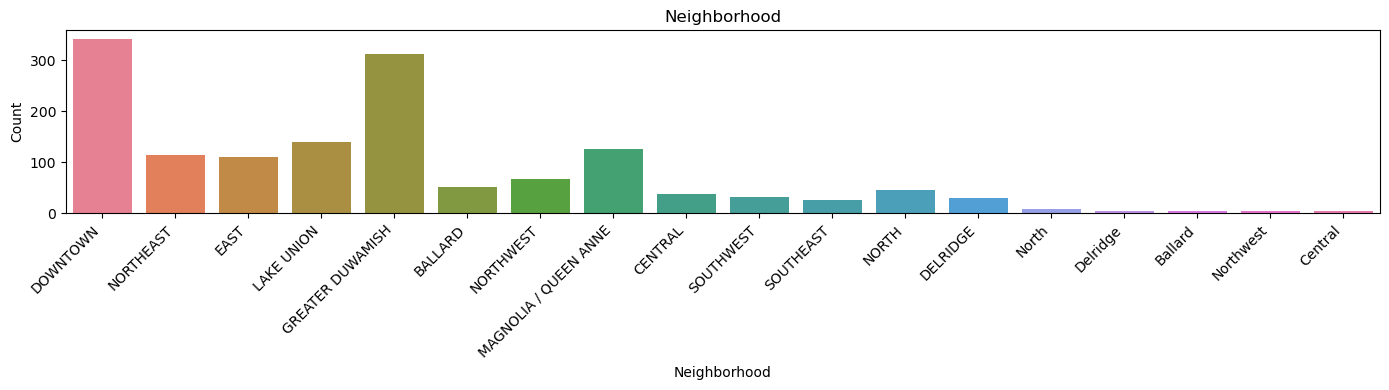

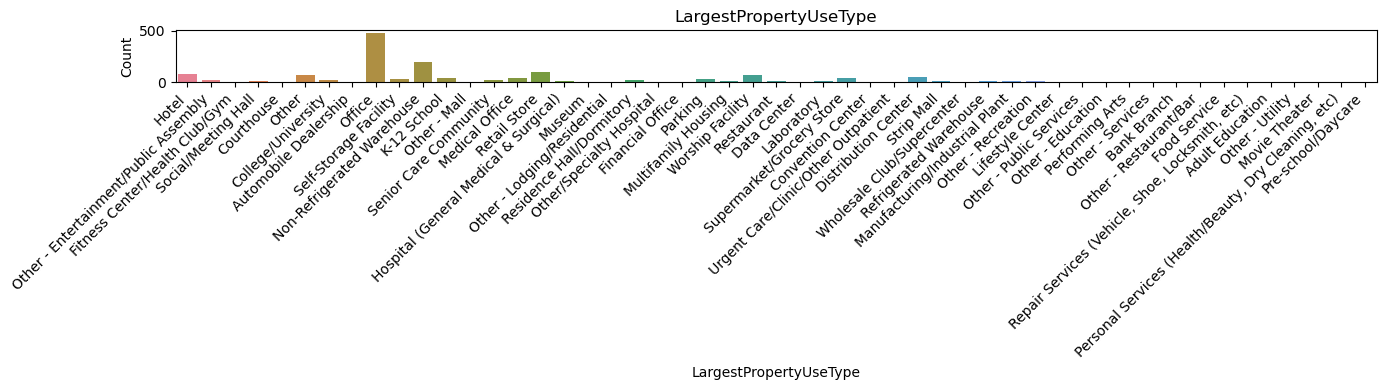

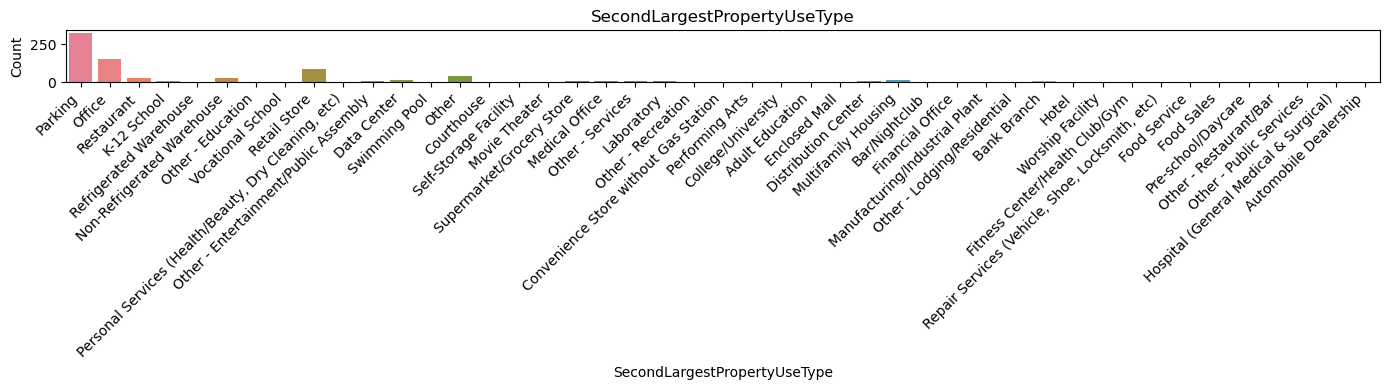

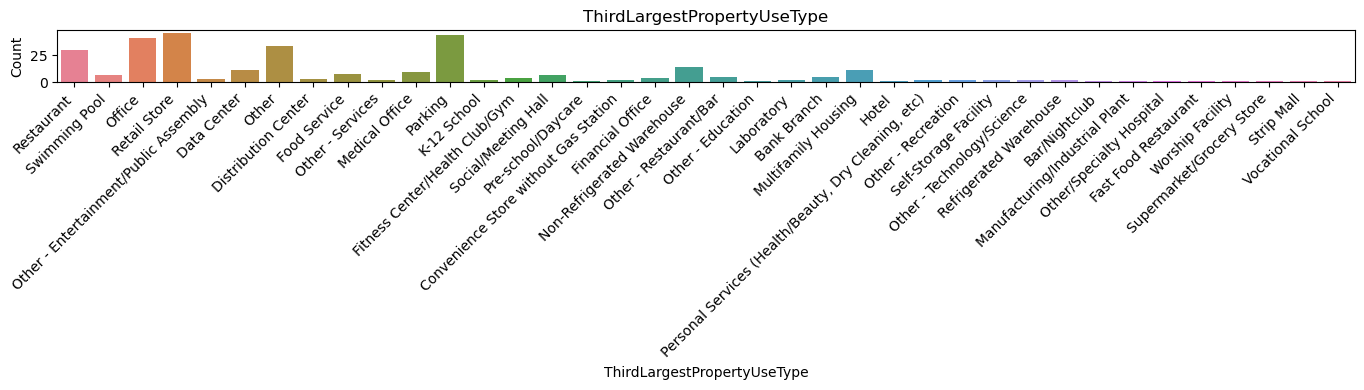

/var/folders/lw/0z6yvdmn5p1fcqf8r658c0sc0000gn/T/ipykernel_49913/111760156.py:20: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


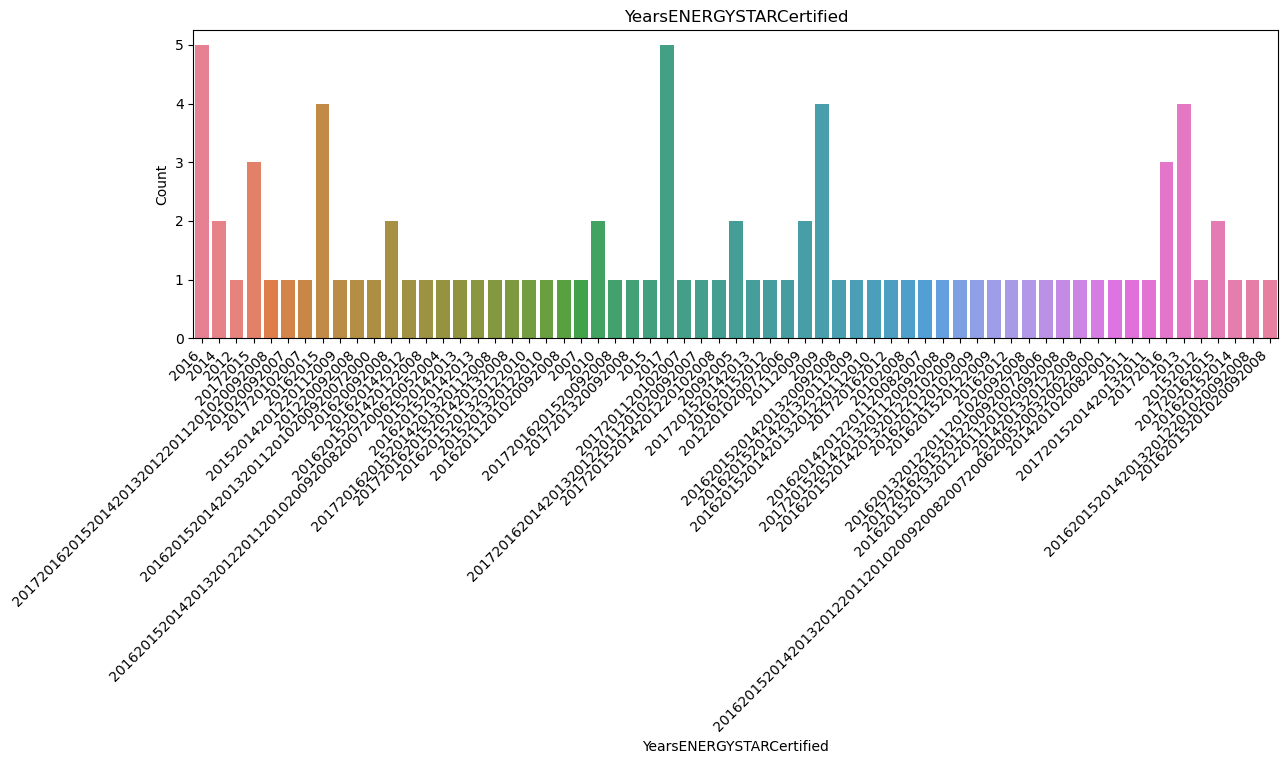

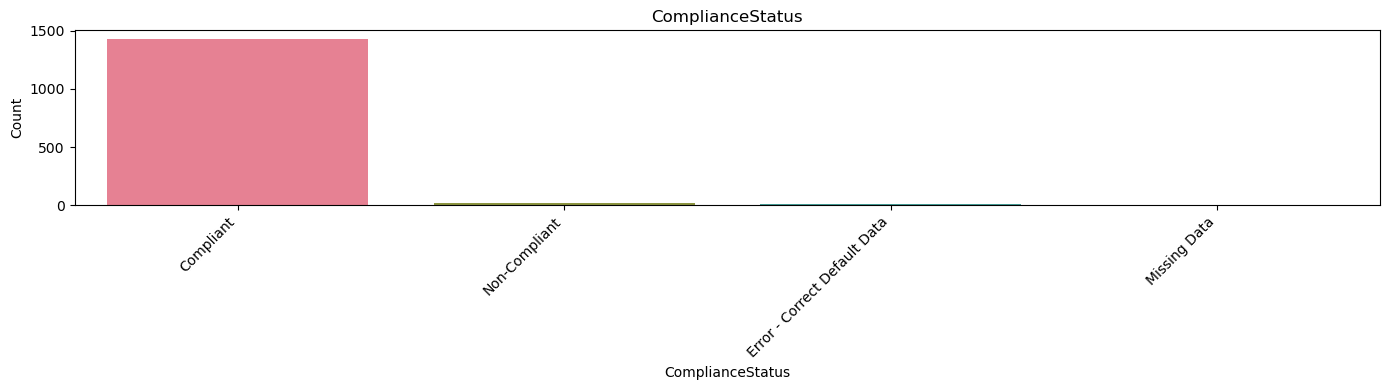

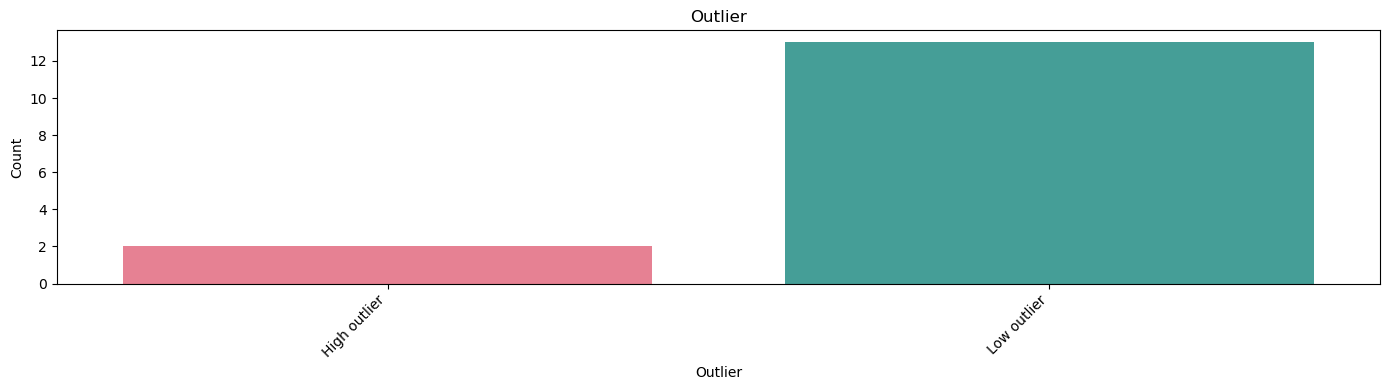

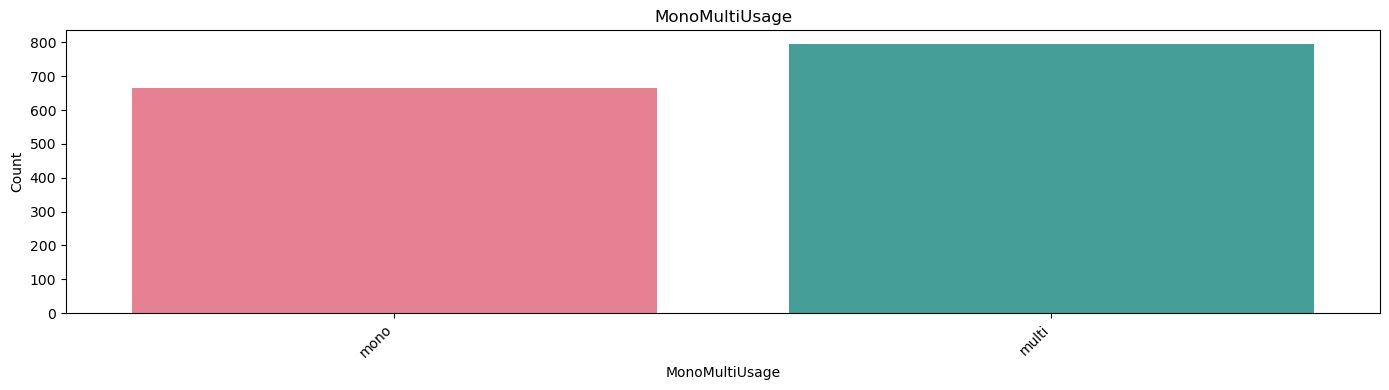

In [78]:
# Visualisation Countplot des colonnes catégorielles

# Seuil pour la lisibilité des graphiques
max_valeurs = 65 

# Boucle pour tracer les countplots en filtrant au vol les colonnes problématiques
for col in categ_cols.columns:
    try:
        if categ_cols[col].nunique() <= max_valeurs:  # On n'affiche pas les colonnes contenant trop de valeurs afin de garder de la lisibilité
            plt.figure(figsize=(14, 4))
            sns.countplot(x=col, 
                          data=categ_cols, 
                          palette=sns.color_palette("husl", categ_cols[col].nunique()) # Appliquer 1 couleur par catégorie
                          )
            
            plt.title(col)
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha='right')  # pour une meilleure lisibilité
            plt.tight_layout()
            plt.show()
    except TypeError:
        continue  # ignore les colonnes non hashables




##### - Réduction du nombre de valeurs distinctes 
###### 1. Colonne `PrimaryPropertyType`

In [79]:
# Réduction du nombre de valeurs distinctes 
# 1. Colonne `PrimaryPropertyType`

freq = df_clean['PrimaryPropertyType'].value_counts()
freq

PrimaryPropertyType
Small- and Mid-Sized Office    288
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             102
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             2
Name: count, dtype: int64

In [80]:
# On fixe un seuil à 2% du total de 1460 observations 
seuil = 0.02*(df_clean.shape[0])
seuil 

29.2

In [81]:
rare_categories = freq[freq < seuil].index
rare_categories

Index(['Self-Storage Facility', 'Residence Hall', 'Senior Care Community',
       'University', 'Refrigerated Warehouse', 'Restaurant', 'Hospital',
       'Laboratory', 'Low-Rise Multifamily'],
      dtype='object', name='PrimaryPropertyType')

In [82]:
# Création d'une nouvelle colonne
df_clean['PrimaryPropertyType_grouped'] = df_clean['PrimaryPropertyType'].replace(
    rare_categories,
    'Other'
)

df_clean['PrimaryPropertyType_grouped'].value_counts()

PrimaryPropertyType_grouped
Other                          316
Small- and Mid-Sized Office    288
Warehouse                      180
Large Office                   168
Mixed Use Property             102
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Name: count, dtype: int64

“Les catégories représentant moins de 2 % des observations ont été regroupées dans une catégorie ‘Other’ afin d’améliorer la lisibilité des visualisations et la robustesse statistique des analyses.”

In [83]:
import matplotlib.pyplot as plt

def plot_hist(df, column, bins=30):
    """
    df : pd.DataFrame
        La dataframe contenant la colonne.
    column : str
        Nom de la colonne à visualiser.
    bins : int, optional
        Nombre de bins pour l'histogramme (default=30).
    """
    plt.figure(figsize=(8,5))
    hist = df[column].hist(bins=bins, edgecolor='black') 
    plt.title(f"Histogramme : {column}")
    plt.xlabel(column)
    plt.ylabel("Fréquence")
    plt.show()

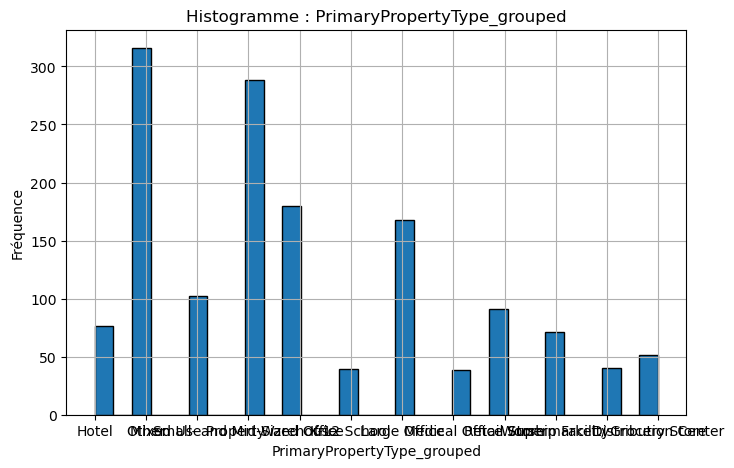

In [84]:
plot_hist(df_clean, 'PrimaryPropertyType_grouped')

###### 2. Colonne `LargestPropertyUseType`

In [85]:
# 2. Colonne `LargestPropertyUseType`

freq = df_clean['LargestPropertyUseType'].value_counts()
freq

LargestPropertyUseType
Office                                                  482
Non-Refrigerated Warehouse                              192
Retail Store                                             97
Hotel                                                    76
Other                                                    71
Worship Facility                                         71
Distribution Center                                      52
Supermarket/Grocery Store                                41
Medical Office                                           40
K-12 School                                              39
Parking                                                  29
Self-Storage Facility                                    27
Residence Hall/Dormitory                                 22
Senior Care Community                                    20
Other - Entertainment/Public Assembly                    18
College/University                                       17
Laboratory       

In [86]:
rare_categories = freq[freq < seuil].index # on garde le même seuil (2% de 1460 car il y a toujours 1460 observations au total)
rare_categories

df_clean['LargestPropertyUseType_grouped'] = df_clean['LargestPropertyUseType'].replace(
    rare_categories,
    'Other'
)

df_clean['LargestPropertyUseType_grouped'].value_counts()

LargestPropertyUseType_grouped
Office                        482
Other                         364
Non-Refrigerated Warehouse    192
Retail Store                   97
Hotel                          76
Worship Facility               71
Distribution Center            52
Supermarket/Grocery Store      41
Medical Office                 40
K-12 School                    39
Name: count, dtype: int64

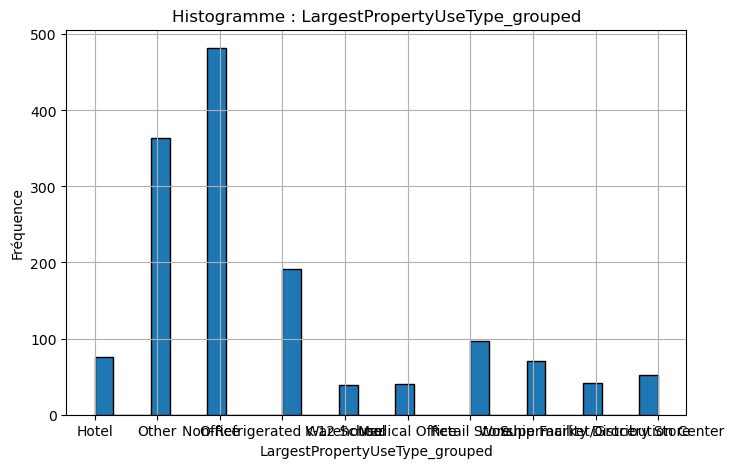

In [87]:
plot_hist(df_clean, 'LargestPropertyUseType_grouped')

###### 3. Colonne `SecondLargestPropertyUseType`

In [88]:
# 3. Colonne `SecondLargestPropertyUseType`

freq = df_clean['SecondLargestPropertyUseType'].value_counts()
freq

SecondLargestPropertyUseType
Parking                                                 324
Office                                                  155
Retail Store                                             84
Other                                                    41
Non-Refrigerated Warehouse                               30
Restaurant                                               28
Data Center                                              13
Multifamily Housing                                      12
Supermarket/Grocery Store                                10
Other - Services                                          8
Medical Office                                            8
Bank Branch                                               7
Other - Entertainment/Public Assembly                     7
Laboratory                                                6
K-12 School                                               5
Distribution Center                                       5
Swimming Po

In [89]:
rare_categories = freq[freq < seuil].index # on garde le même seuil
rare_categories

df_clean['SecondLargestPropertyUseType_grouped'] = df_clean['SecondLargestPropertyUseType'].replace(
    rare_categories,
    'Other'
)

df_clean['SecondLargestPropertyUseType_grouped'].value_counts()

SecondLargestPropertyUseType_grouped
Parking                       324
Other                         203
Office                        155
Retail Store                   84
Non-Refrigerated Warehouse     30
Name: count, dtype: int64

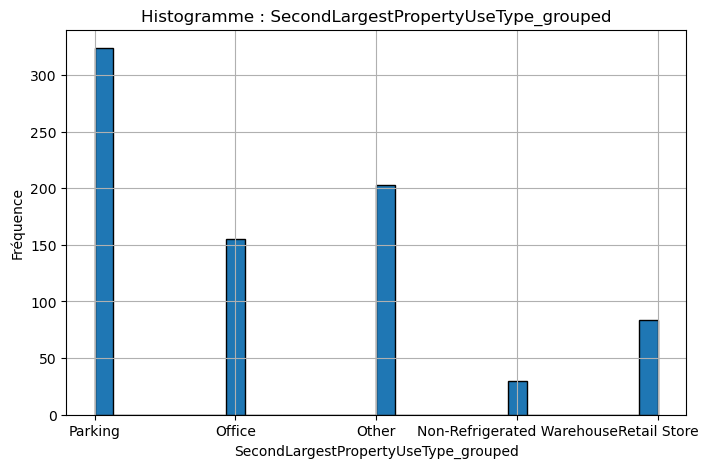

In [90]:
plot_hist(df_clean, 'SecondLargestPropertyUseType_grouped')

###### 4. Colonne `ThirdLargestPropertyUseType`

In [91]:
# 4. Colonne `ThirdLargestPropertyUseType`

freq = df_clean['ThirdLargestPropertyUseType'].value_counts()
freq

ThirdLargestPropertyUseType
Retail Store                                            46
Parking                                                 44
Office                                                  41
Other                                                   34
Restaurant                                              30
Non-Refrigerated Warehouse                              14
Multifamily Housing                                     11
Data Center                                             11
Medical Office                                           9
Food Service                                             8
Social/Meeting Hall                                      7
Swimming Pool                                            7
Bank Branch                                              5
Other - Restaurant/Bar                                   5
Fitness Center/Health Club/Gym                           4
Financial Office                                         4
Distribution Center         

In [92]:
rare_categories = freq[freq < seuil].index # on garde le même seuil
rare_categories

df_clean['ThirdLargestPropertyUseType_grouped'] = df_clean['ThirdLargestPropertyUseType'].replace(
    rare_categories,
    'Other'
)

df_clean['ThirdLargestPropertyUseType_grouped'].value_counts()

ThirdLargestPropertyUseType_grouped
Other           154
Retail Store     46
Parking          44
Office           41
Restaurant       30
Name: count, dtype: int64

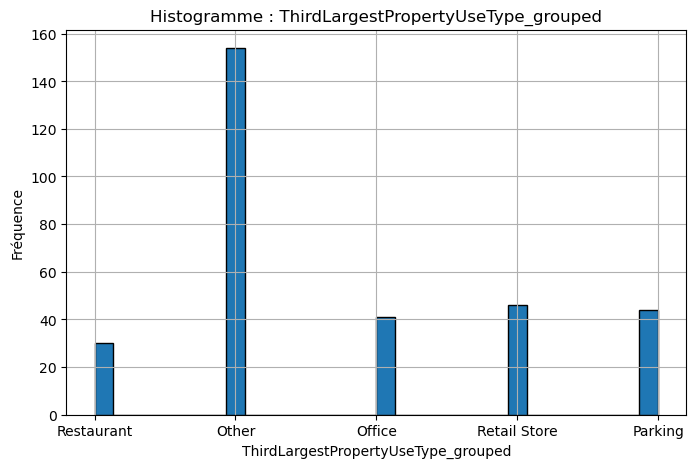

In [93]:
plot_hist(df_clean, 'ThirdLargestPropertyUseType_grouped')

##### - Extraction des informations de la colonne `YearsENERGYSTARCertified`

La variable YearsENERGYSTARCertified étant un historique concaténé, elle a été transformée en indicateurs synthétiques décrivant la présence, la durée et la récence de la certification, afin de conserver l’information pertinente tout en évitant une explosion dimensionnelle.

In [94]:
df_clean['Has_ENERGYSTAR'] = df_clean['YearsENERGYSTARCertified'].notna().astype(int)

df_clean['ENERGYSTAR_Years_Count'] = df_clean['YearsENERGYSTARCertified'].apply(lambda x: len(str(x)) // 4 if pd.notna(x) else 0)

In [95]:
print(df_clean['Has_ENERGYSTAR'].sum())

90


In [96]:
df_clean[['PrimaryPropertyType_grouped', "LargestPropertyUseType_grouped", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseType_grouped", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseType_grouped"]]

PrimaryPropertyType_grouped LargestPropertyUseType_grouped  \
0                           Hotel                          Hotel   
1                           Hotel                          Hotel   
2                           Hotel                          Hotel   
3                           Hotel                          Hotel   
4                           Hotel                          Hotel   
...                           ...                            ...   
3338                    Warehouse     Non-Refrigerated Warehouse   
3339  Small- and Mid-Sized Office                         Office   
3340                        Other                          Other   
3347                  K-12 School                    K-12 School   
3356           Mixed Use Property                          Other   

      LargestPropertyUseTypeGFA SecondLargestPropertyUseType_grouped  \
0                       88434.0                                  NaN   
1                       83880.0                              Parking   
2                      756493.0                                  NaN   
3                       61320.0                                  NaN   
4                      123445.0                              Parking   
...                         ...                                  ...   
3338                    52085.0                                  NaN   
3339                    24990.0                                  NaN   
3340                    72000.0                                  NaN   
3347                    45728.0                              Parking   
3356                   151523.0                               Office   

      SecondLargestPropertyUseTypeGFA ThirdLargestPropertyUseType_grouped  
0                                 NaN                                 NaN  
1                             15064.0                          Restaurant  
2                                 NaN                                 NaN  
3                                 NaN                                 NaN  
4                             68009.0                               Other  
...                               ...                                 ...  
3338                              NaN                                 NaN  
3339                              NaN                                 NaN  
3340                              NaN                                 NaN  
3347                              0.0                                 NaN  
3356                         106498.0                             Parking  

[1460 rows x 6 columns]

In [97]:
df_clean

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3338  98108.0                    2824049007                    2   
3339  98108.0                    2824049007                    2   
3340  98155.0                    0225049062                    4   
3347  98144.0                    7548300840                    3   
3356  98109.0                    4088803385                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN  47.61220 -122.33799       1927                1.0   
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3340         NORTHEAST  47.68109 -122.26180       2013                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   
3356        LAKE UNION  47.62497 -122.33883       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                

#### II. 3. b) Colonnes catégorielles après regroupement

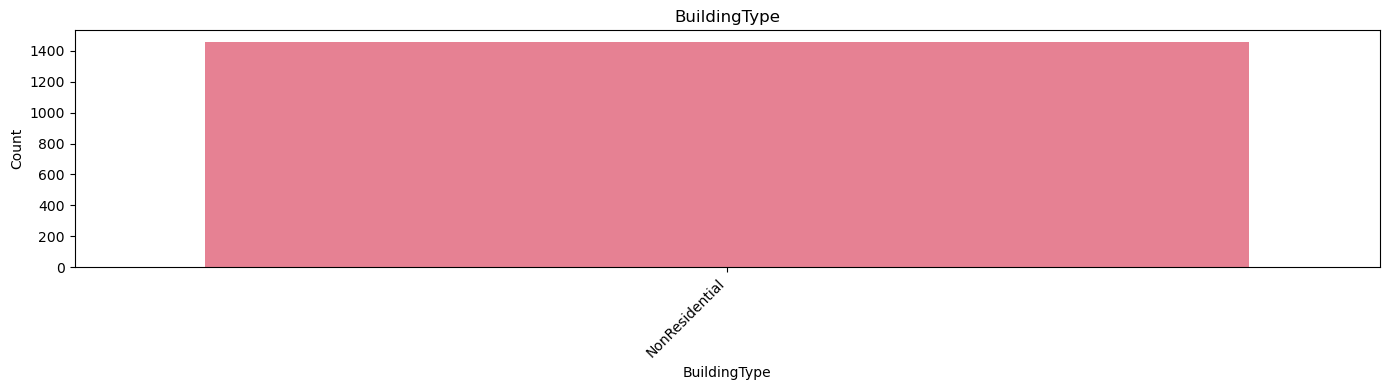

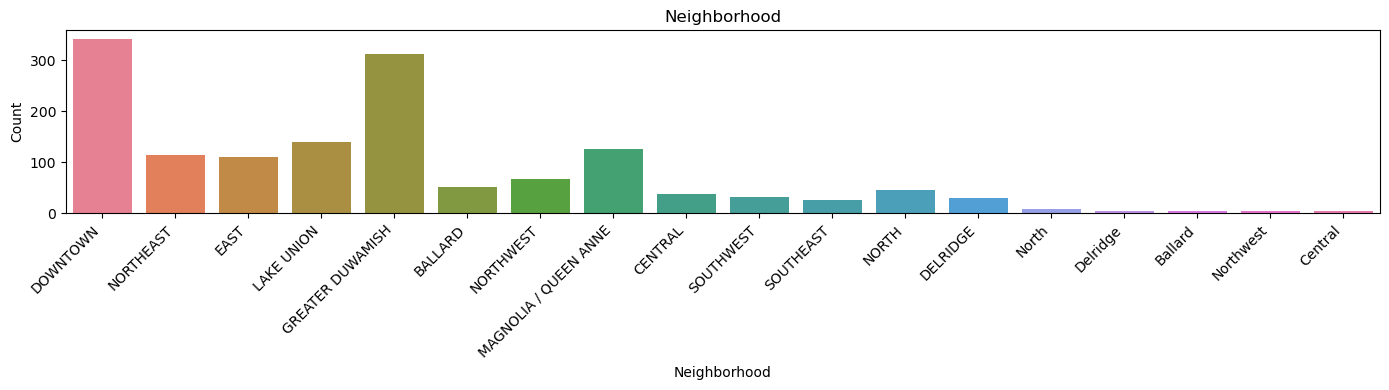

/var/folders/lw/0z6yvdmn5p1fcqf8r658c0sc0000gn/T/ipykernel_49913/1779173415.py:27: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


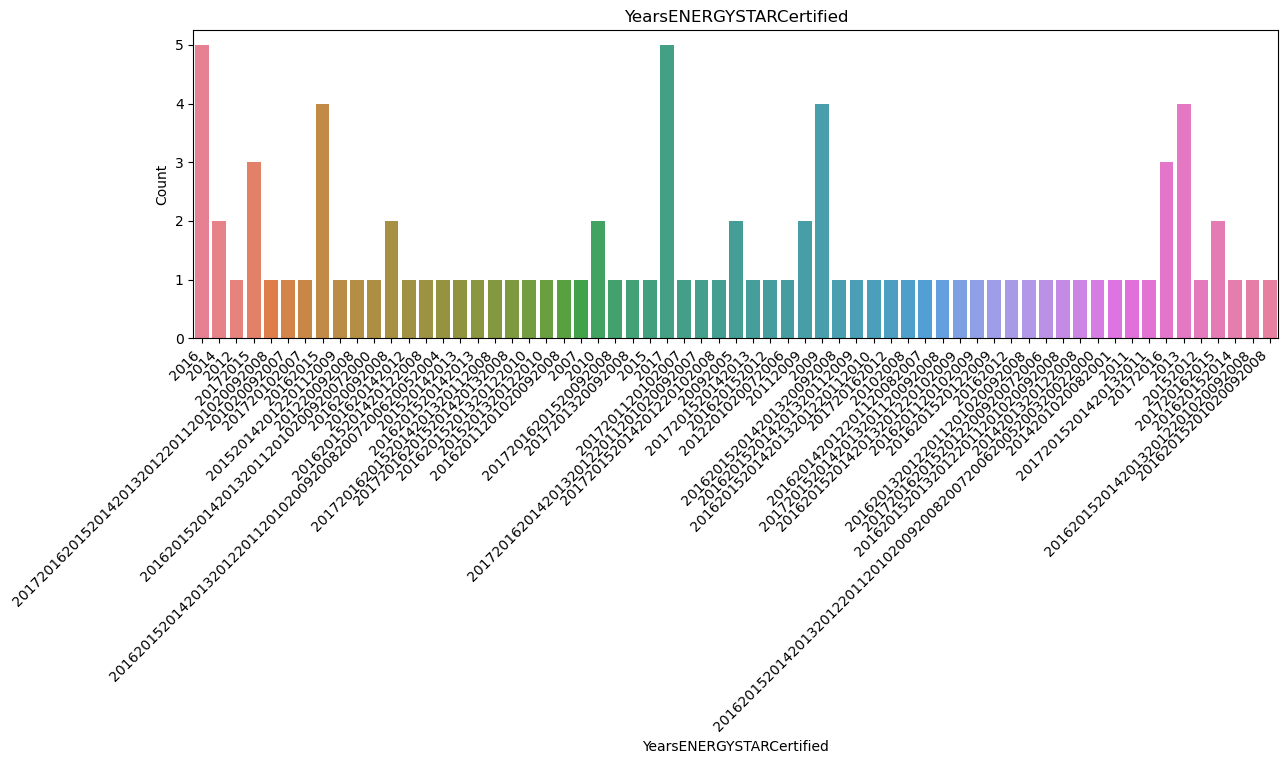

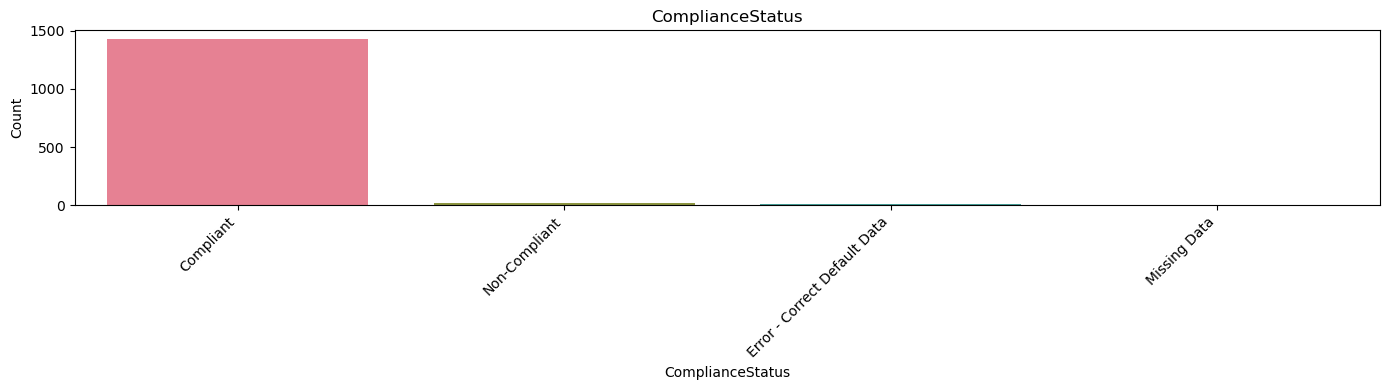

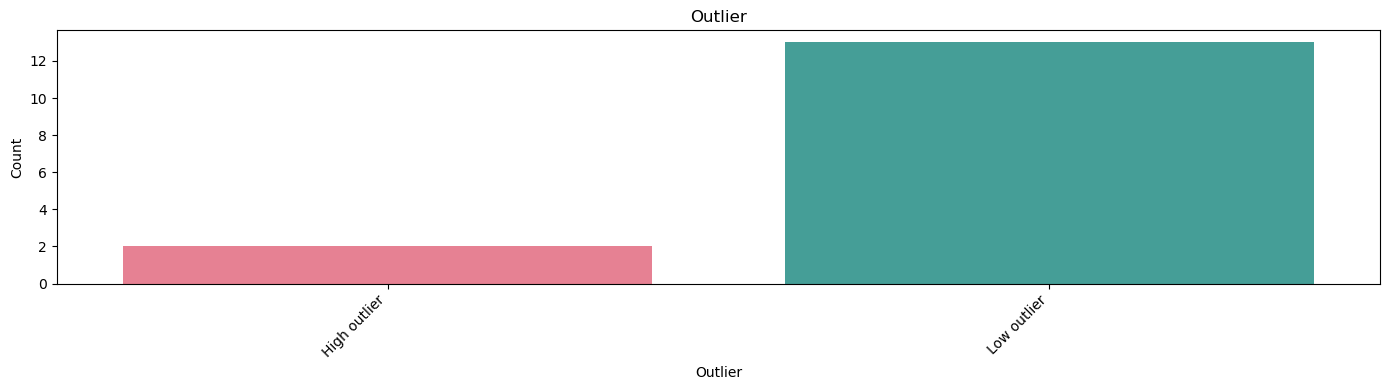

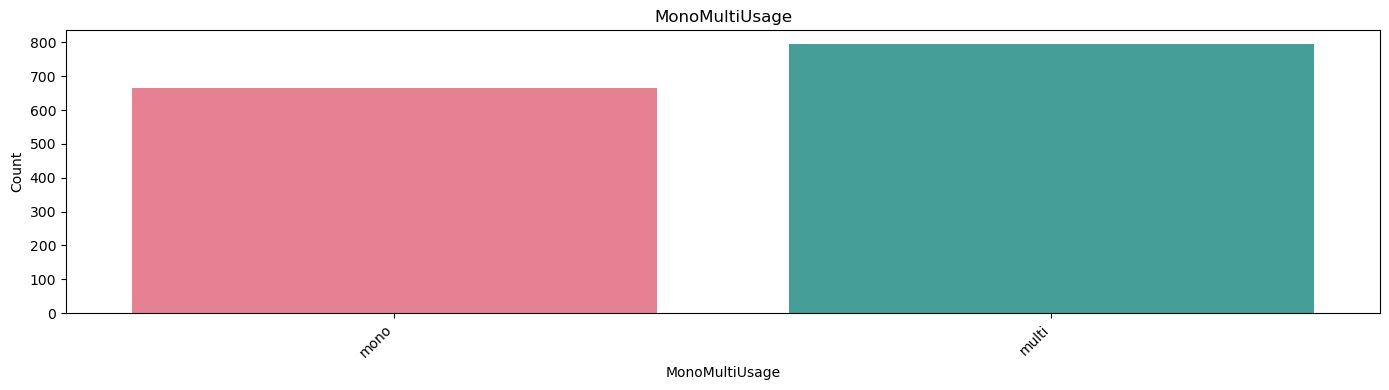

In [98]:
# Visualisation des countplots des variables catégorielles après regroupement des modalités rares

# Nouvelles colonnes catégorielles
categ_cols_grouped = df_clean.select_dtypes(include='object') # Toutes les colonnes catégorielles
grouped_cols = categ_cols_grouped.filter(regex='_grouped$').columns # Colonnes regroupées
originals_to_drop = [col.replace('_grouped', '') for col in grouped_cols] # Colonnes originales correspondantes (sans _grouped)
categ_cols_final = categ_cols.drop(columns=originals_to_drop, errors='ignore') # Colonnes finales à garder


# Seuil pour la lisibilité des graphiques
max_valeurs = 65 

# Boucle pour tracer les countplots en filtrant au vol les colonnes problématiques
for col in categ_cols_final.columns:
    try:
        if categ_cols_final[col].nunique() <= max_valeurs:  # On n'affiche pas les colonnes contenant trop de valeurs afin de garder de la lisibilité
            plt.figure(figsize=(14, 4))
            sns.countplot(x=col, 
                          data=categ_cols_final, 
                          palette=sns.color_palette("husl", categ_cols_final[col].nunique()) # Appliquer 1 couleur par catégorie
                          )
            
            plt.title(col)
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.xticks(rotation=45, ha='right')  # pour une meilleure lisibilité
            plt.tight_layout()
            plt.show()
    except TypeError:
        continue  # ignore les colonnes non hashables



#### II. 3. c) Colonnes numériques

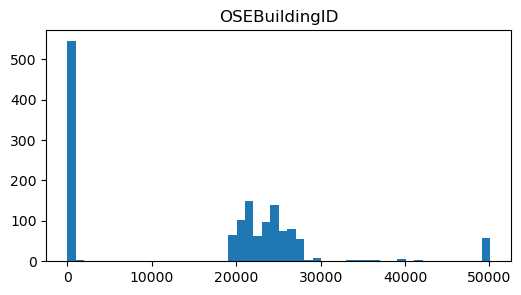

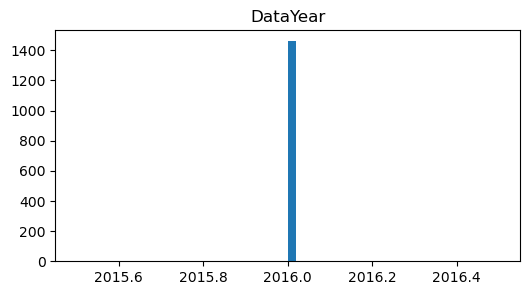

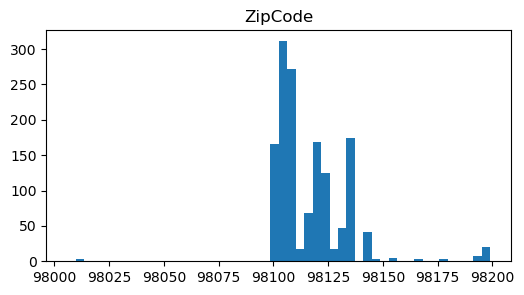

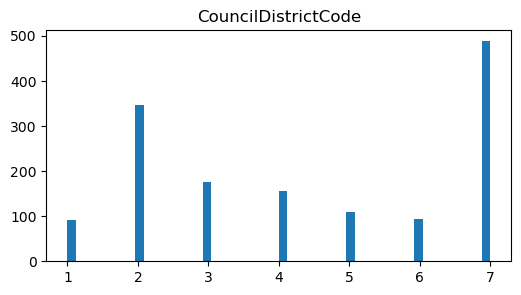

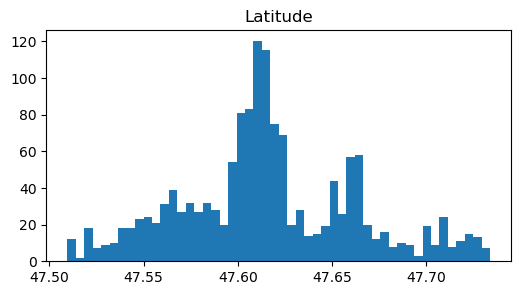

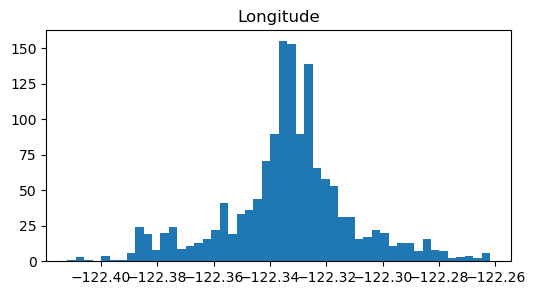

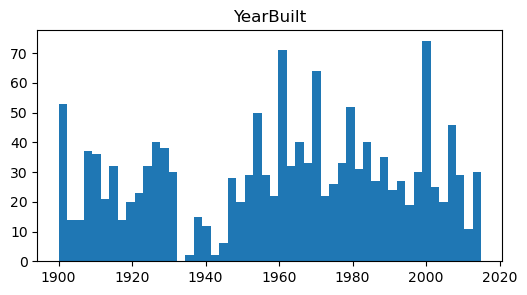

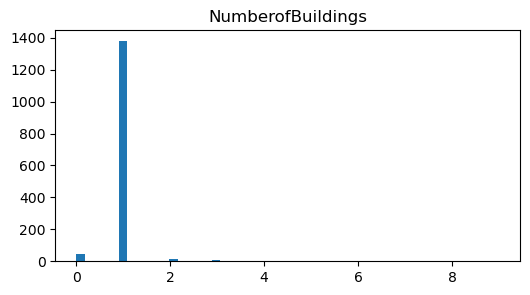

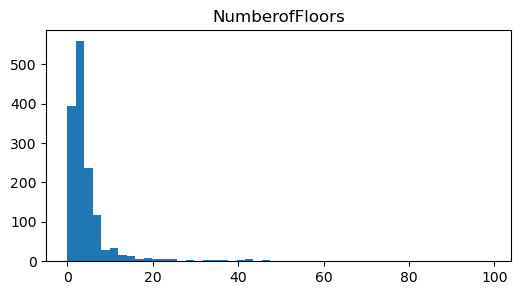

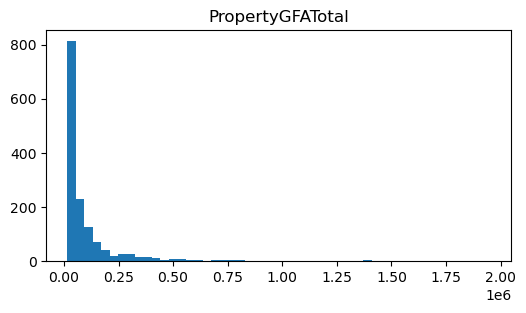

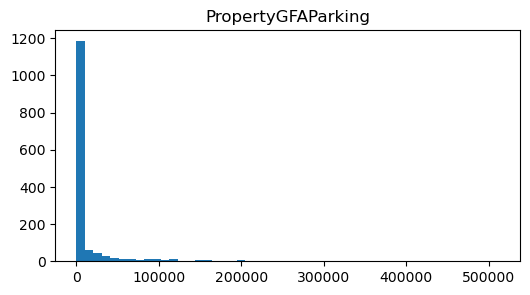

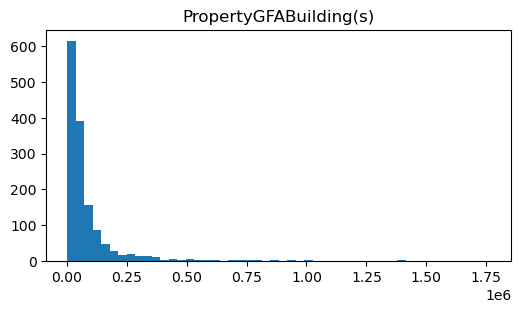

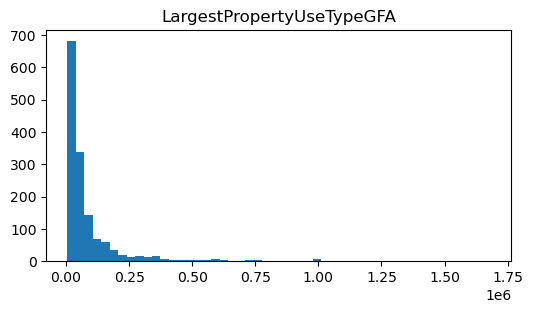

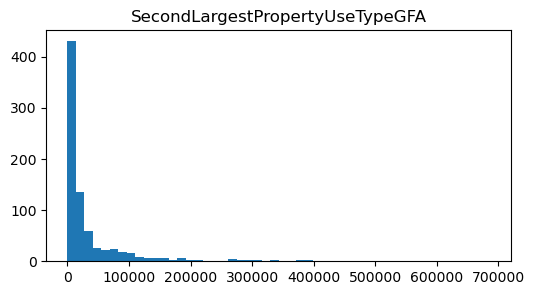

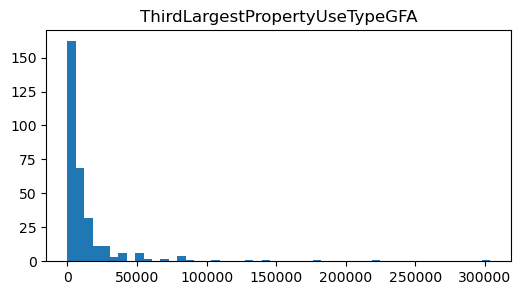

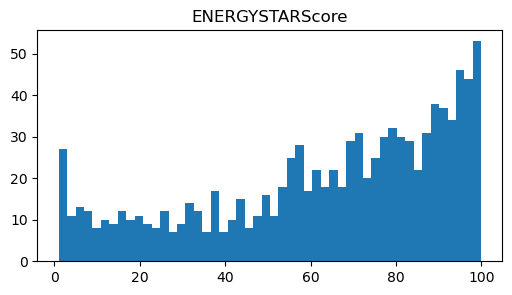

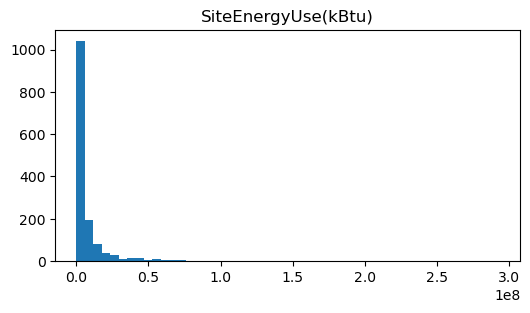

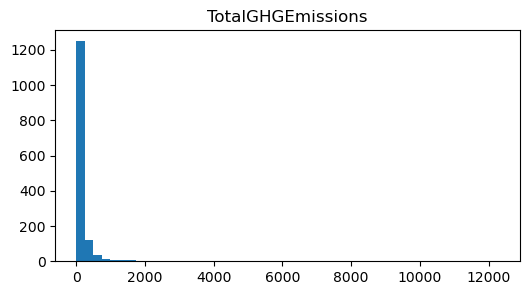

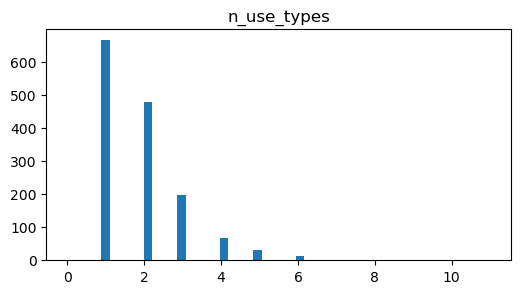

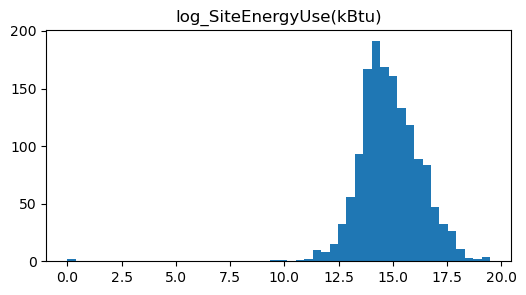

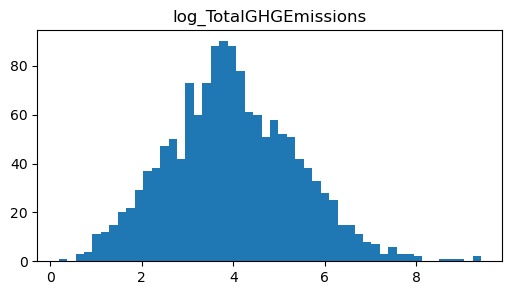

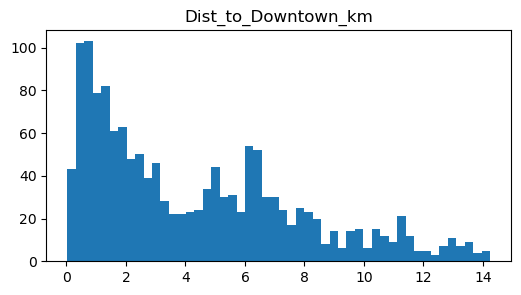

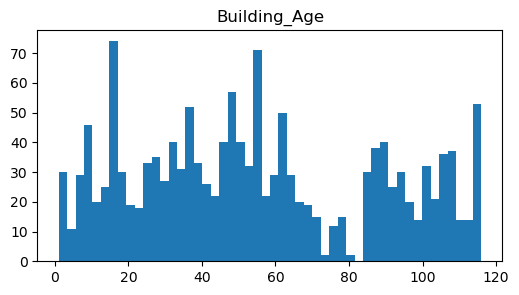

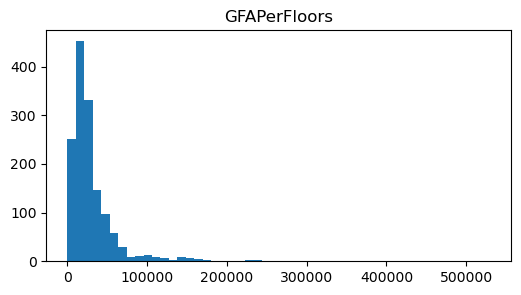

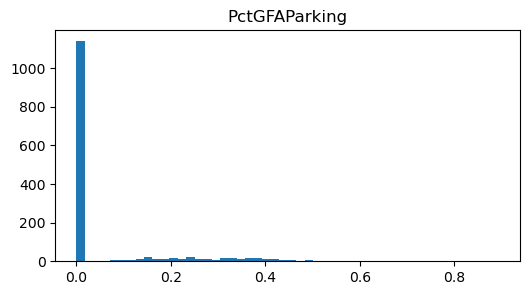

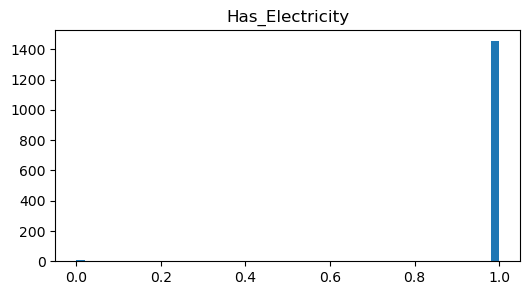

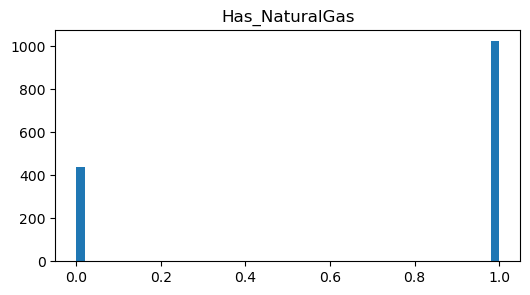

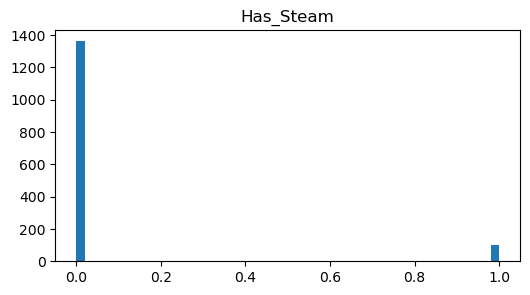

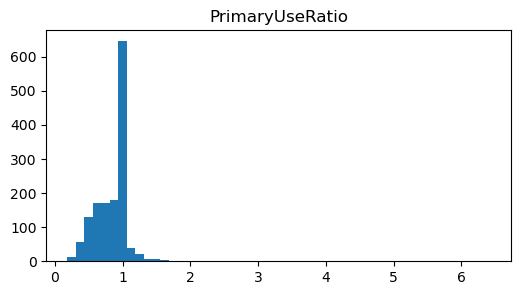

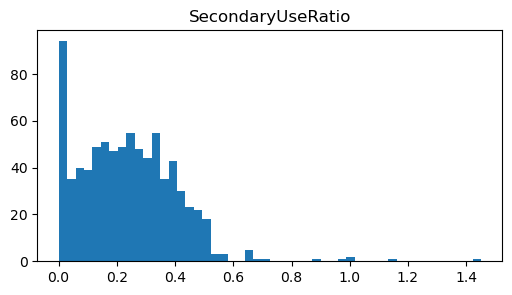

In [99]:
# Colonnes numériques : Supprimer les colonnes encodées que l'on examinera prochainement
# Elles sont binaires (0/1) et très majoritairement 0, donc les histogrammes classiques ne sont pas pertinents

cols_to_exclude = encoded.columns  # toutes les colonnes créées par le binarizer
numeric_cols = numeric_cols.drop(columns=cols_to_exclude, errors='ignore')

# Remplacer inf et -inf par NaN
numeric_cols.replace([np.inf, -np.inf], np.nan, inplace=True)

# Boucle pour tracer les histogrammes
for col in numeric_cols.columns:
    # Ignorer les colonnes vides
    if numeric_cols[col].dropna().empty:
        continue
    plt.figure(figsize=(6,3))
    plt.hist(numeric_cols[col].dropna(), bins=50)  # dropna pour être sûr
    plt.title(col)
    plt.show()


In [100]:
encoded.shape

(1460, 10)

In [101]:
# Somme par colonne (nombre d'apparitions pour chaque catégorie)
counts = encoded.sum().sort_values(ascending=False)  # tri décroissant pour plus de lisibilité
counts

Office                        692
Other                         639
Parking                       406
Retail Store                  250
Non-Refrigerated Warehouse    245
Restaurant                     98
Hotel                          81
Worship Facility               76
Distribution Center            61
Medical Office                 61
dtype: int64

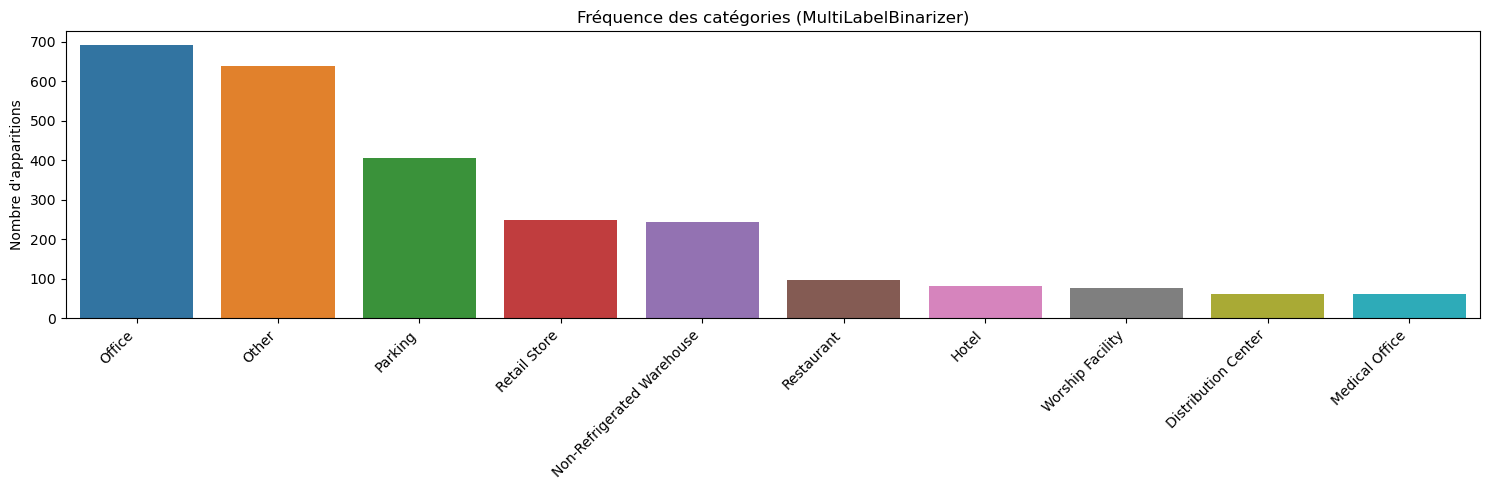

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))
sns.barplot(x=counts.index, y=counts.values)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Nombre d'apparitions")
plt.title("Fréquence des catégories (MultiLabelBinarizer)")
plt.tight_layout()
plt.show()


In [103]:
# Sélection des colonnes numériques
numeric_cols = df_clean.select_dtypes(include=['int64','float64'])

# Supprimer les colonnes encodées par le MultiLabelBinarizer
numeric_cols = numeric_cols.drop(columns=encoded.columns, errors='ignore')

numeric_cols.head()

OSEBuildingID  DataYear  ZipCode  CouncilDistrictCode  Latitude  Longitude  \
0              1      2016  98101.0                    7  47.61220 -122.33799   
1              2      2016  98101.0                    7  47.61317 -122.33393   
2              3      2016  98101.0                    7  47.61393 -122.33810   
3              5      2016  98101.0                    7  47.61412 -122.33664   
4              8      2016  98121.0                    7  47.61375 -122.34047   

   YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       1927                1.0              12             88434   
1       1996                1.0              11            103566   
2       1969                1.0              41            956110   
3       1926                1.0              10             61320   
4       1980                1.0              18            175580   

   PropertyGFAParking  PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                   0                   88434                    88434.0   
1               15064                   88502                    83880.0   
2              196718                  759392                   756493.0   
3                   0                   61320                    61320.0   
4               62000                  113580                   123445.0   

   SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                              NaN                             NaN   
1                          15064.0                          4622.0   
2                              NaN                             NaN   
3                              NaN                             NaN   
4                          68009.0                             0.0   

   ENERGYSTARScore  SiteEnergyUse(kBtu)  TotalGHGEmissions  n_use_types  \
0             60.0            7226362.5             249.98            1   
1             61.0            8387933.0             295.86            3   
2             43.0           72587024.0            2089.28            1   
3             56.0            6794584.0             286.43            1   
4             75.0           14172606.0             505.01            3   

   log_SiteEnergyUse(kBtu)  log_TotalGHGEmissions  Dist_to_Downtown_km  \
0                15.793246               5.529350             0.800050   
1                15.942305               5.696624             0.787077   
2                18.100297               7.645532             0.970109   
3                15.731637               5.664452             0.944139   
4                16.466822               6.228531             1.048092   

   Building_Age  GFAPerFloors  PctGFAParking  Has_Electricity  Has_NaturalGas  \
0            89   7369.500000       0.000000                1               1   
1            20   9415.090909       0.145453                1               1   
2            47  23319.756098       0.205748                1               1   
3            90   6132.000000       0.000000                1               1   
4            36   9754.444444       0.353115                1               1   

   Has_Steam  PrimaryUseRatio  SecondaryUseRatio  Has_ENERGYSTAR  \
0          1         1.000000                NaN               0   
1          0         0.809918           0.145453               0   
2          1         0.791220                NaN               0   
3          1         1.000000                NaN               0   
4          0         0.703070           0.387339               0   

   ENERGYSTAR_Years_Count  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [104]:
numeric_cols['ZipCode'].unique()

array([98101., 98121., 98104., 98105., 98070., 98118., 98107., 98144.,
       98103., 98109., 98119., 98136., 98122., 98126., 98133., 98033.,
       98112., 98115., 98108., 98125., 98134., 98117., 98191., 98154.,
       98164., 98195., 98185., 98181., 98102., 98199., 98168., 98155.,
       98106., 98006., 98053., 98013., 98116., 98178., 98114., 98165.,
       98011., 98146., 98113., 98111., 98177., 98020., 98145.])

### III. 4. Corrélation

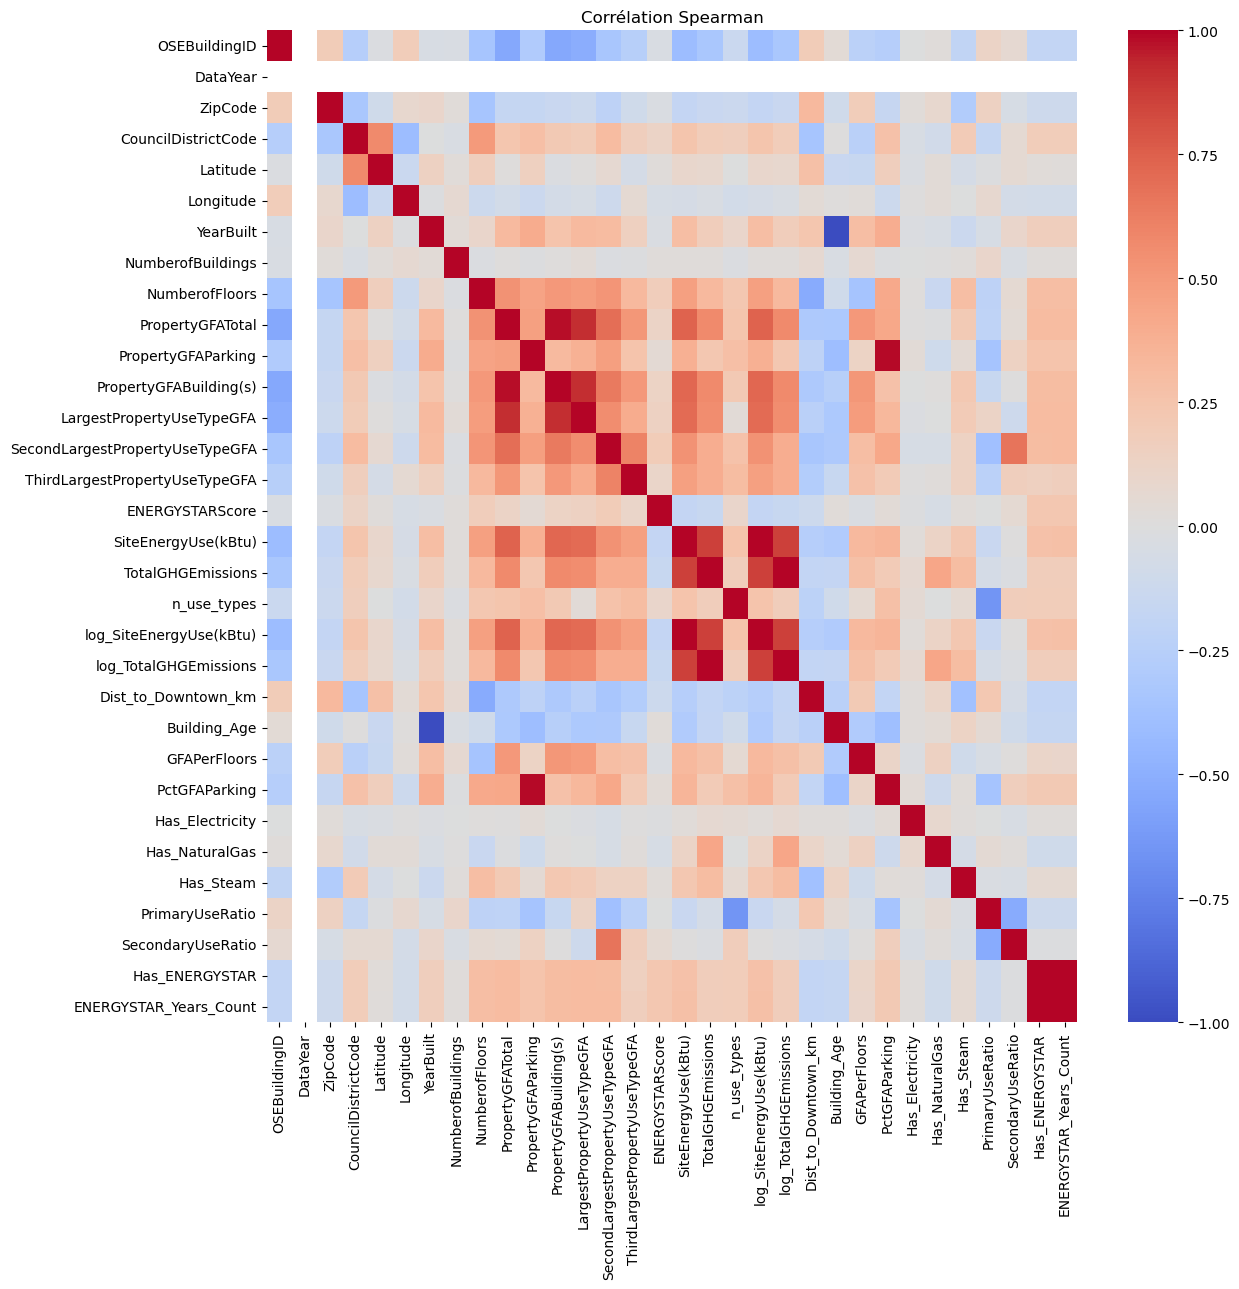

In [105]:
# Corrélation après le feature engineering
corr_matrix_spearman = numeric_cols.corr(method='spearman')

# Heatmap Spearman
plt.figure(figsize=(13, 13))
sns.heatmap(corr_matrix_spearman, annot=False, cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title("Corrélation Spearman")

plt.tight_layout()
plt.show()

In [106]:
df_clean

OSEBuildingID  DataYear    BuildingType          PrimaryPropertyType  \
0                 1      2016  NonResidential                        Hotel   
1                 2      2016  NonResidential                        Hotel   
2                 3      2016  NonResidential                        Hotel   
3                 5      2016  NonResidential                        Hotel   
4                 8      2016  NonResidential                        Hotel   
...             ...       ...             ...                          ...   
3338          50068      2016  NonResidential                    Warehouse   
3339          50069      2016  NonResidential  Small- and Mid-Sized Office   
3340          50070      2016  NonResidential                        Other   
3347          50081      2016  NonResidential                  K-12 School   
3356          50094      2016  NonResidential           Mixed Use Property   

                                PropertyName                    Address  \
0                       Mayflower park hotel              405 Olive way   
1                            Paramount Hotel            724 Pine street   
2                    5673-The Westin Seattle            1900 5th Avenue   
3                                  HOTEL MAX             620 STEWART ST   
4                WARWICK SEATTLE HOTEL (ID8)              401 LENORA ST   
...                                      ...                        ...   
3338  Airport - Maintenance Shop - DOT: KCIA                 6518 Ellis   
3339                 Airport - Main Terminal         7277 Perimeter Rd.   
3340                Tennis Center Sand Point  7135 Sportsfield Drive NE   
3347                  Hamlin Robinson School        1701 20th Ave South   
3356                                    AIBS        601 Westlake Ave N.   

      ZipCode TaxParcelIdentificationNumber  CouncilDistrictCode  \
0     98101.0                    0659000030                    7   
1     98101.0                    0659000220                    7   
2     98101.0                    0659000475                    7   
3     98101.0                    0659000640                    7   
4     98121.0                    0659000970                    7   
...       ...                           ...                  ...   
3338  98108.0                    2824049007                    2   
3339  98108.0                    2824049007                    2   
3340  98155.0                    0225049062                    4   
3347  98144.0                    7548300840                    3   
3356  98109.0                    4088803385                    7   

          Neighborhood  Latitude  Longitude  YearBuilt  NumberofBuildings  \
0             DOWNTOWN  47.61220 -122.33799       1927                1.0   
1             DOWNTOWN  47.61317 -122.33393       1996                1.0   
2             DOWNTOWN  47.61393 -122.33810       1969                1.0   
3             DOWNTOWN  47.61412 -122.33664       1926                1.0   
4             DOWNTOWN  47.61375 -122.34047       1980                1.0   
...                ...       ...        ...        ...                ...   
3338  GREATER DUWAMISH  47.54425 -122.31776       1955                1.0   
3339  GREATER DUWAMISH  47.53161 -122.29944       1929                1.0   
3340         NORTHEAST  47.68109 -122.26180       2013                1.0   
3347  GREATER DUWAMISH  47.58831 -122.30650       2015                1.0   
3356        LAKE UNION  47.62497 -122.33883       2015                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                

In [107]:
list(df_clean.columns)

['OSEBuildingID',
 'DataYear',
 'BuildingType',
 'PrimaryPropertyType',
 'PropertyName',
 'Address',
 'ZipCode',
 'TaxParcelIdentificationNumber',
 'CouncilDistrictCode',
 'Neighborhood',
 'Latitude',
 'Longitude',
 'YearBuilt',
 'NumberofBuildings',
 'NumberofFloors',
 'PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'ListOfAllPropertyUseTypes',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'YearsENERGYSTARCertified',
 'ENERGYSTARScore',
 'SiteEnergyUse(kBtu)',
 'ComplianceStatus',
 'Outlier',
 'TotalGHGEmissions',
 'parsed',
 'parsed_simple',
 'n_use_types',
 'parsed_simple_grouped',
 'Distribution Center',
 'Hotel',
 'Medical Office',
 'Non-Refrigerated Warehouse',
 'Office',
 'Other',
 'Parking',
 'Restaurant',
 'Retail Store',
 'Worship Facility',
 'log_SiteEnergyUse(kBtu)',
 'log_TotalGHGEmissions',
 'Dist_to_Dow

In [108]:
df_clean.shape

(1460, 65)

### III. 5. Nettoyage 
#### III. 5. a) des colonnes non utiles

In [109]:
# ==========================
# Variables prédictives (X)
# ==========================

X = df_clean.drop(columns=[
    # Identifiants et informations très spécifiques non généralisables
    'OSEBuildingID', 'TaxParcelIdentificationNumber',
    'PropertyName', 'Address',

    # Variables redondantes ou déjà agrégées
    'YearsENERGYSTARCertified',
    'Latitude', 'Longitude', 'DataYear', 'YearBuilt',
    'ListOfAllPropertyUseTypes', 'parsed', 'parsed_simple','parsed_simple_grouped', 
    'LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType',

    # Variables causant du data leakage
    'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
    'log_SiteEnergyUse(kBtu)', 'log_TotalGHGEmissions',
    'ENERGYSTARScore', 'ComplianceStatus', 'Outlier'
]).copy()

# =====================
# Variables cibles (y)
# =====================

y_energy = df_clean['log_SiteEnergyUse(kBtu)'].fillna(0) # on impute 0 aux NaN
y_ghg = df_clean['log_TotalGHGEmissions'].fillna(0) # il faut éviter d'en avoir pour l'entraînement des modèles

---
**Remarque :** On ne prend pas en compte 'LargestPropertyUseType', etc. mais la version "_\_grouped_" *pour éviter le **surapprentissage** sur des catégories **ultra rares**.*


In [110]:
X.shape

(1460, 42)

In [111]:
X

BuildingType          PrimaryPropertyType  ZipCode  \
0     NonResidential                        Hotel  98101.0   
1     NonResidential                        Hotel  98101.0   
2     NonResidential                        Hotel  98101.0   
3     NonResidential                        Hotel  98101.0   
4     NonResidential                        Hotel  98121.0   
...              ...                          ...      ...   
3338  NonResidential                    Warehouse  98108.0   
3339  NonResidential  Small- and Mid-Sized Office  98108.0   
3340  NonResidential                        Other  98155.0   
3347  NonResidential                  K-12 School  98144.0   
3356  NonResidential           Mixed Use Property  98109.0   

      CouncilDistrictCode      Neighborhood  NumberofBuildings  \
0                       7          DOWNTOWN                1.0   
1                       7          DOWNTOWN                1.0   
2                       7          DOWNTOWN                1.0   
3                       7          DOWNTOWN                1.0   
4                       7          DOWNTOWN                1.0   
...                   ...               ...                ...   
3338                    2  GREATER DUWAMISH                1.0   
3339                    2  GREATER DUWAMISH                1.0   
3340                    4         NORTHEAST                1.0   
3347                    3  GREATER DUWAMISH                1.0   
3356                    7        LAKE UNION                1.0   

      NumberofFloors  PropertyGFATotal  PropertyGFAParking  \
0                 12             88434                   0   
1                 11            103566               15064   
2                 41            956110              196718   
3                 10             61320                   0   
4                 18            175580               62000   
...              ...               ...                 ...   
3338               1             52085                4222   
3339               2             24990                   0   
3340               1             72000                   0   
3347               3             45000                   0   
3356               6            345290               85028   

      PropertyGFABuilding(s)  LargestPropertyUseTypeGFA  \
0                      88434                    88434.0   
1                      88502                    83880.0   
2                     759392                   756493.0   
3                      61320                    61320.0   
4                     113580                   123445.0   
...                      ...                        ...   
3338                   47863                    52085.0   
3339                   24990                    24990.0   
3340                   72000                    72000.0   
3347                   45000                    45728.0   
3356                  260262                   151523.0   

      SecondLargestPropertyUseTypeGFA  ThirdLargestPropertyUseTypeGFA  \
0                                 NaN                             NaN   
1                             15064.0                          4622.0   
2                                 NaN                             NaN   
3                                 NaN                             NaN   
4                             68009.0                             0.0   
...                               ...                             ...   
3338                              NaN                             NaN   
3339                              NaN                             NaN   
3340                              NaN                             NaN   
3347                              0.0                             NaN   
3356                         106498.0                         84002.0   

      n_use_types  Distribution Center  Hotel  Medical Office  \
0               1                    0      1               0   
1        

#### III. 5. b) Gestion des valeurs manquantes

In [112]:
# ===================================================
#  GESTION DES VALEURS MANQUANTES AVANT MODELISATION 
# ===================================================

# Nombre de NaN par colonne
null_counts = X.isnull().sum()

# Filtrer seulement les colonnes avec au moins un NaN
cols_with_null = null_counts[null_counts > 0]
print(cols_with_null)

NumberofBuildings                          2
LargestPropertyUseTypeGFA                  6
SecondLargestPropertyUseTypeGFA          664
ThirdLargestPropertyUseTypeGFA          1145
GFAPerFloors                              13
PrimaryUseRatio                            6
SecondaryUseRatio                        664
LargestPropertyUseType_grouped             6
SecondLargestPropertyUseType_grouped     664
ThirdLargestPropertyUseType_grouped     1145
dtype: int64


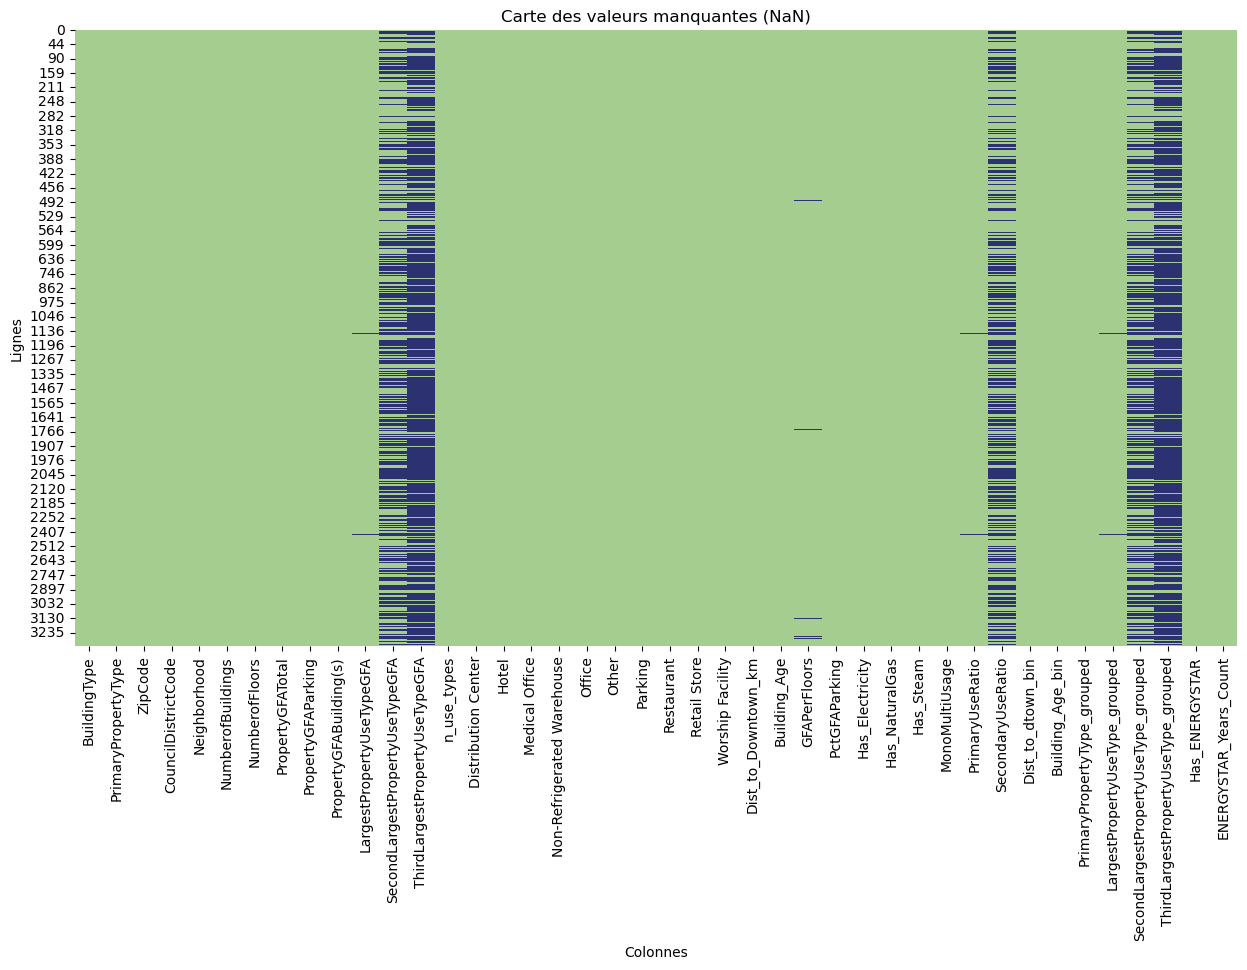

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))

sns.heatmap(X.isna() # booléens True/False indiquant si les valeurs sont manquantes (True le cas échéant)
            , cbar=False # pas besoin de spectre de couleur
            , cmap="crest") 

plt.title("Carte des valeurs manquantes (NaN)")
plt.xlabel("Colonnes")
plt.ylabel("Lignes")
plt.show()

In [114]:
# Déterminer la méthode de traitement appropriée pour chaque colonne

with pd.option_context('display.max_rows', None):
    for col in cols_with_null.index:
        print(f"\n{col} ({cols_with_null[col]} NaN):")      # Afficher toutes les valeurs uniques des colonnes contenant au moins un NaN pour avoir une idée de comment traiter les NaN
        print(X[col].unique()[:20], "...")


NumberofBuildings (2 NaN):
[ 1.  3.  0.  2.  4.  6.  9.  5. nan  7.  8.] ...

LargestPropertyUseTypeGFA (6 NaN):
[ 88434.  83880. 756493.  61320. 123445.  81352. 102761. 163984. 133884.
 336640.  65009. 295511.  67390.  90000. 348329.  16442. 104352. 537150.
 385274.  58006.] ...

SecondLargestPropertyUseTypeGFA (664 NaN):
[    nan  15064.  68009.  57600.  25200.  40000.  85000.  15505.  30586.
  42000.  18153. 276000.  39314.   7849.  28197.  65676.   5681.   4993.
  23500.  10043.] ...

ThirdLargestPropertyUseTypeGFA (1145 NaN):
[   nan  4622.     0.  9741.  4500.  4307. 71000.  3859.   493.  5459.
  5000.  9604.  8000. 17020. 15139. 26203.  4551.  6000.  2406.  4579.] ...

GFAPerFloors (13 NaN):
[ 7369.5         9415.09090909 23319.75609756  6132.
  9754.44444444  7546.18181818 12845.125      10932.26666667
 13923.90909091 13327.04        7223.22222222  9574.3030303
  8380.90909091 17318.5        14867.17857143 11490.4
 10435.2        54036.         20277.57894737 14765.33333333] .

# III. Modélisation 

## III. 1. Comparaison de différents modèles supervisés

A réaliser :
* Pour chaque algorithme que vous allez tester, vous devez :
    * Réaliser au préalable une séparation en jeu d'apprentissage et jeu de test via une validation croisée.
    * Si les features quantitatives que vous souhaitez utiliser ont des ordres de grandeur très différents les uns des autres, et que vous utilisez un algorithme de regression qui est sensible à cette différence, alors il faut réaliser un scaling (normalisation) de la donnée au préalable.
    * Entrainer le modèle sur le jeu de Train
    * Prédire la cible sur la donnée de test (nous appelons cette étape, l'inférence).
    * Calculer les métriques de performance R2, MAE et RMSE sur le jeu de train et de test.
    * Interpréter les résultats pour juger de la fiabilité de l'algorithme.
* Vous pouvez choisir par exemple de tester un modèle linéaire, un modèle à base d'arbres et un modèle de type SVM
* Déterminer le modèle le plus performant parmi ceux testés.

In [115]:
# Attribution manuelle des types de colonnes
categorical_features = [
    'BuildingType',
    'ZipCode',
    'CouncilDistrictCode', 
    'Neighborhood', 
    'PrimaryPropertyType_grouped',
    'LargestPropertyUseType_grouped',
    'SecondLargestPropertyUseType_grouped',
    'ThirdLargestPropertyUseType_grouped',
    'MonoMultiUsage',
    'Building_Age_bin', 
    'Dist_to_dtown_bin'
]

num_continuous_features  = [
    'LargestPropertyUseTypeGFA', # surface = 0 si l'usage de la propriété n'est pas défini
    'SecondLargestPropertyUseTypeGFA',
    'ThirdLargestPropertyUseTypeGFA',
    'PropertyGFATotal',
    'PropertyGFAParking', 
    'PropertyGFABuilding(s)', 
    'Dist_to_Downtown_km',
    'GFAPerFloors',
    'PctGFAParking',
    'Building_Age',
    'PrimaryUseRatio',
    'SecondaryUseRatio'   
]

num_discrete_features = [
    'NumberofBuildings',
    'NumberofFloors', 
    'n_use_types',
    'Distribution Center', 
    'Hotel', 
    'Medical Office', 
    'Office', 
    'Non-Refrigerated Warehouse', 
    'Other', 
    'Parking', 
    'Restaurant', 
    'Retail Store',
    'Worship Facility', 
    'ENERGYSTAR_Years_Count', # 0 année de labellisation si aucune
    'Has_Electricity', 
    'Has_NaturalGas', 
    'Has_Steam', 
    'Has_ENERGYSTAR'
]

# Regroupement des colonnes numériques 
numeric_features = num_discrete_features + num_continuous_features

# Changement de dtype
dtype_mapping = {
    "category": categorical_features,
    "float32": num_continuous_features,
    "int32": num_discrete_features
}

In [116]:
X.dtypes

BuildingType                              object
PrimaryPropertyType                       object
ZipCode                                  float64
CouncilDistrictCode                        int64
Neighborhood                              object
NumberofBuildings                        float64
NumberofFloors                             int64
PropertyGFATotal                           int64
PropertyGFAParking                         int64
PropertyGFABuilding(s)                     int64
LargestPropertyUseTypeGFA                float64
SecondLargestPropertyUseTypeGFA          float64
ThirdLargestPropertyUseTypeGFA           float64
n_use_types                                int64
Distribution Center                        int64
Hotel                                      int64
Medical Office                             int64
Non-Refrigerated Warehouse                 int64
Office                                     int64
Other                                      int64
Parking             

In [117]:
# Vérification
X[num_discrete_features].dtypes

NumberofBuildings             float64
NumberofFloors                  int64
n_use_types                     int64
Distribution Center             int64
Hotel                           int64
Medical Office                  int64
Office                          int64
Non-Refrigerated Warehouse      int64
Other                           int64
Parking                         int64
Restaurant                      int64
Retail Store                    int64
Worship Facility                int64
ENERGYSTAR_Years_Count          int64
Has_Electricity                 int64
Has_NaturalGas                  int64
Has_Steam                       int64
Has_ENERGYSTAR                  int64
dtype: object

In [118]:
X[num_continuous_features].dtypes

LargestPropertyUseTypeGFA          float64
SecondLargestPropertyUseTypeGFA    float64
ThirdLargestPropertyUseTypeGFA     float64
PropertyGFATotal                     int64
PropertyGFAParking                   int64
PropertyGFABuilding(s)               int64
Dist_to_Downtown_km                float64
GFAPerFloors                       float64
PctGFAParking                      float64
Building_Age                         int64
PrimaryUseRatio                    float64
SecondaryUseRatio                  float64
dtype: object

In [119]:
X[categorical_features].dtypes

BuildingType                              object
ZipCode                                  float64
CouncilDistrictCode                        int64
Neighborhood                              object
PrimaryPropertyType_grouped               object
LargestPropertyUseType_grouped            object
SecondLargestPropertyUseType_grouped      object
ThirdLargestPropertyUseType_grouped       object
MonoMultiUsage                            object
Building_Age_bin                        category
Dist_to_dtown_bin                       category
dtype: object

In [120]:
# Création d'une fonction d'entrainement et d'évaluation de modèles prédéterminés

# Import de librairies classiques
import numpy as np
import pandas as pd

# Import du Pipeline 
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# Import des méthodes d'encodage et de transformation
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Import des outils d'entrainement et d'évaluation
from sklearn.model_selection import KFold, train_test_split, cross_validate, cross_val_predict, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Import des modèles
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb 

# ======================
# 0. Vérification des y
# ======================

if y_ghg.isna().sum() > 0:
    raise ValueError("y_ghg contient des NaN !")
    
if y_energy.isna().sum() > 0:
    raise ValueError("y_energy contient des NaN !")

# =============================================================
# 1. Création de pipeline (sélection de modèle & preprocessing)
# =============================================================

def make_pipeline(model_name):

    if model_name == "Linear Regression":
        model = LinearRegression()
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat',
                 Pipeline([
                     ('imputer', SimpleImputer(strategy='constant', fill_value='Not_known')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
                 ]),
                 categorical_features),

                ('num',
                 Pipeline([
                     ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
                     ('scaler', StandardScaler())
                 ]),
                 numeric_features)
            ]
        )

    elif model_name == "Random Forest":
        model = RandomForestRegressor(random_state=42)
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat',
                 Pipeline([
                     ('imputer', SimpleImputer(strategy='constant', fill_value='Not_known')),
                     ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
                 ]),
                 categorical_features),

                ('num', SimpleImputer(strategy='constant', fill_value=0), numeric_features)
            ]
        )

    elif model_name == "LightGBM":
        model = lgb.LGBMRegressor(random_state=42, verbose=-1)
        preprocessor = ColumnTransformer(
            transformers=[
                ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features),
                ('num', 'passthrough', numeric_features)
            ]
        )

    else:
        raise ValueError("Modèle inconnu")
        
    pipe = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    return pipe 

# ======================
# 2. Train / Test split
# ======================

def split_data(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    
    return X_train, X_test, y_train, y_test


# =================================
# 3. Cross-validation sur le train
# =================================

def evaluate_pipeline(pipe, X_train, y_train, metrics, cv=5):
    cv_scores = cross_validate(       # permet de spécifier des métriques multiples pour l'évaluation
        pipe,
        X_train,
        y_train,
        cv=cv,
        scoring=metrics,              # choix de la métrique d'évaluation
        n_jobs=-1                     # Nombre de 'jobs' (tâches) à exécuter en parallèle
    )
    
    return cv_scores

# ===============================================
# 4. Entrainement final & évaluation sur le test
# ===============================================


def test_pipeline(pipe, X_train, X_test, y_train, y_test):
    
    pipe.fit(X_train, y_train)    # Transformation (pipe) + entraînement sur le 'train' (fit)
    y_pred = pipe.predict(X_test) # Transformation (pipe) + Prédiction (predict)
    
    return {
        "r2": r2_score(y_test, y_pred),
        "rmse": np.sqrt(mean_squared_error(y_test, y_pred)),
        "mae": mean_absolute_error(y_test, y_pred)
    }


In [121]:
# =======================================
# 5. Boucle d'expérimentation & Résultats
# =======================================

results = []

targets = {
    "ghg": y_ghg,
    "energy": y_energy
}

models = ["Linear Regression", "Random Forest", "LightGBM"]

metrics = {
    "r2": "r2", # r2 est à maximiser (plus on est proche de 1, meilleure est la performance)
    "rmse": "neg_root_mean_squared_error", # RMSE est à minimiser, donc le RMSE négatif est à maximiser
    "mae": "neg_mean_absolute_error" # pareil que pour RMSE, MAE négatif est à maximiser
}

for target_name, y in targets.items():
    
    X_train, X_test, y_train, y_test = split_data(X, y) # Train/test split pour chaque cible y_ghg et y_energy
    
    for model_name in models:

        pipe = make_pipeline(model_name)
        
        # Cross-validation uniquement sur le 'train'
        cv_scores = evaluate_pipeline(
            pipe,
            X_train,
            y_train,
            
            metrics=list(metrics.values())
        )

        # Entrainement final + évaluation sur le test
        test_scores = test_pipeline(pipe, X_train, X_test, y_train, y_test)

        for metric_name, sk_metric in metrics.items():
            results.append({
                "target": target_name,
                "model": model_name,
                "metric": metric_name,
                "cv_mean": -cv_scores[f"test_{sk_metric}"].mean() # on ajoute un '-' pour obtenir RMSE, ou MAE...
                           if "neg" in sk_metric                  # ... dans le cas des neg_RMSE, ou neg_MAE
                           else cv_scores[f"test_{sk_metric}"].mean(), 
                "test_score": test_scores[metric_name]
            })

/Users/elodiechen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/elodiechen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/elodiechen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/elodiechen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(
/Users/elodiechen/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2691: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with f

In [122]:
results_df = pd.DataFrame(results)
results_df.sort_values(["target", "metric", "cv_mean"])

target              model metric   cv_mean  test_score
14  energy      Random Forest    mae  0.567923    0.673914
17  energy           LightGBM    mae  0.614730    0.710517
11  energy  Linear Regression    mae  0.724582    0.771033
9   energy  Linear Regression     r2  0.386938    0.421793
15  energy           LightGBM     r2  0.515830    0.352358
12  energy      Random Forest     r2  0.553300    0.577418
13  energy      Random Forest   rmse  0.977702    1.158257
16  energy           LightGBM   rmse  1.021111    1.433895
10  energy  Linear Regression   rmse  1.100206    1.354851
5      ghg      Random Forest    mae  0.608366    0.639163
8      ghg           LightGBM    mae  0.625504    0.648903
2      ghg  Linear Regression    mae  0.724340    0.740163
0      ghg  Linear Regression     r2  0.534707    0.546206
6      ghg           LightGBM     r2  0.645173    0.666107
3      ghg      Random Forest     r2  0.659021    0.678984
4      ghg      Random Forest   rmse  0.813365    0.825704
7      ghg           LightGBM   rmse  0.829325    0.842102
1      ghg  Linear Regression   rmse  0.950434    0.981726

## III. 2. Optimisation et interprétation du modèle
A réaliser :
* Reprennez le meilleur algorithme que vous avez sécurisé via l'étape précédente, et réalisez une GridSearch de petite taille sur au moins 3 hyperparamètres.
* Si le meilleur modèle fait partie de la famille des modèles à arbres (RandomForest, GradientBoosting) alors utilisez la fonctionnalité feature importance pour identifier les features les plus impactantes sur la performance du modèle. Sinon, utilisez la méthode Permutation Importance de sklearn.

In [123]:
# On choisit le score sur lequel on se base pour le “meilleur modèle”
# Ici : test_score (colonne qui concerne directement la performance sur le test set)
 
def best_model_selection(df):
    best_rows = []
    for target in df['target'].unique():
        for metric in df['metric'].unique():
            sub = df[(df['target']==target) & (df['metric']==metric)]
            if metric in ['rmse', 'mae']:
                best_row = sub.loc[sub['test_score'].idxmin()]  # plus petit = meilleur
            else:                                               # par exemple r2
                best_row = sub.loc[sub['test_score'].idxmax()]  # plus grand = meilleur
            best_rows.append(best_row)
    return pd.DataFrame(best_rows)

best_models = best_model_selection(results_df)
print(best_models[['target', 'metric', 'model', 'test_score']])

    target metric          model  test_score
3      ghg     r2  Random Forest    0.678984
4      ghg   rmse  Random Forest    0.825704
5      ghg    mae  Random Forest    0.639163
12  energy     r2  Random Forest    0.577418
13  energy   rmse  Random Forest    1.158257
14  energy    mae  Random Forest    0.673914


Le modèle de Random Forest **explique environ :**

- **58 % de la variance** *(voir le score r2)* de la **consommation énergétique** et 
- **68% de la variance** des **émissions de GES** dans l’espace log-transformé.

Cette capacité prédictive est satisfaisante compte tenu :

- de la diversité des bâtiments non résidentiels
- des comportements d’usage non observables
- et de l’absence de données temporelles.

On choisit de faire du GridSearchCV sur : 

👉 Random Forest

### III. 2. a) Random Forest pour y_ghg

In [124]:
# 1. Pipeline
pipe_rf = make_pipeline("Random Forest")

# 2. Train / test split
X_train, X_test, y_train, y_test = split_data(X, y_ghg)


# 3. GridSearch (sur le train uniquement)
param_grid_rf = {
    "model__n_estimators": [200, 500],
    "model__max_depth": [None, 10],
    "model__min_samples_leaf": [1, 5]
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

# 4. Évaluation finale sur le test
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

grid_rf.fit(X_train, y_train)

print("Meilleurs hyperparamètres Random Forest pour y_ghg :", grid_rf.best_params_)
print("Meilleur R² CV :", grid_rf.best_score_)

Meilleurs hyperparamètres Random Forest pour y_ghg : {'model__max_depth': 10, 'model__min_samples_leaf': 1, 'model__n_estimators': 500}
Meilleur R² CV : 0.6553668060520381


In [125]:
print("R2 test :", r2_score(y_test, y_pred))
print("RMSE test :", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE test :", mean_absolute_error(y_test, y_pred))

R2 test : 0.6803859927051854
RMSE test : 0.8238986220318549
MAE test : 0.6356618517409269


### III. 2. b) Random Forest pour y_energy

In [126]:
# 1. Pipeline
pipe_rf = make_pipeline("Random Forest")

# 2. Train / test split
X_train, X_test, y_train, y_test = split_data(X, y_energy)


# 3. GridSearch (sur le train uniquement)
param_grid_rf = {
    "model__n_estimators": [200, 500],
    "model__max_depth": [None, 10],
    "model__min_samples_leaf": [1, 5]
}

grid_rf = GridSearchCV(
    pipe_rf,
    param_grid=param_grid_rf,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid_rf.fit(X_train, y_train)

# 4. Évaluation finale sur le test
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

grid_rf.fit(X_train, y_train)

print("Meilleurs hyperparamètres Random Forest pour y_energy :", grid_rf.best_params_)
print("Meilleur R² CV :", grid_rf.best_score_)

Meilleurs hyperparamètres Random Forest pour y_energy : {'model__max_depth': 10, 'model__min_samples_leaf': 5, 'model__n_estimators': 500}
Meilleur R² CV : 0.5572806153357656


In [127]:
best_rf = grid_rf.best_estimator_
y_pred = best_rf.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("R2 test :", r2)
print("RMSE test :", rmse)
print("MAE test :", mae)

R2 test : 0.40277204485321527
RMSE test : 1.3769549094256728
MAE test : 0.6810861903284482


In [128]:
def get_feature_names(pipe):
    preprocessor = pipe.named_steps["preprocessor"]
    cat_features = preprocessor.named_transformers_["cat"] \
        .named_steps["encoder"].get_feature_names_out(categorical_features)
    num_features = numeric_features
    return np.concatenate([cat_features, num_features])


feature_names = get_feature_names(best_rf)
importances = best_rf.named_steps["model"].feature_importances_

fi_rf = (
    pd.DataFrame({
        "feature": feature_names,
        "importance": importances
    })
    .sort_values("importance", ascending=False)
)

fi_rf.head(10)

feature  importance
137                                   PropertyGFATotal    0.607135
134                          LargestPropertyUseTypeGFA    0.050754
139                             PropertyGFABuilding(s)    0.043233
141                                       GFAPerFloors    0.040413
140                                Dist_to_Downtown_km    0.033897
81               PrimaryPropertyType_grouped_Warehouse    0.022666
131                                     Has_NaturalGas    0.021492
143                                       Building_Age    0.020705
92   LargestPropertyUseType_grouped_Supermarket/Gro...    0.018901
80   PrimaryPropertyType_grouped_Supermarket / Groc...    0.018597